<a href="https://colab.research.google.com/github/Rudradityo/Paraphrase-Detection/blob/master/Experiment_4_(Ver_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Paraphrase Detection on Microsoft Research Paraphrase Corpus</h3>

In [0]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install shap
!pip install eli5

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144789 sha256=42895ba2003f5d324064bf4bb9938ed802552790dc30352d48e4994ca9d93158
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein
     |████████████████████████████████| 276kB 5.9MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394131 sha256=fdb9419fb17d88c932e1453276bf0babf9dadf37fee0732a5739f50aa73c7803
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
     |████████████████████████████████| 112kB 6.1MB/s 


In [0]:
!pip install spacy

In [0]:
# !python -m spacy download en
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 53.5MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=3881701206c4a18feddccf2624f411d5b322755ff5a0596cb00d7091098ab5b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-tn2oum7f/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
!pip install contractions

     |████████████████████████████████| 245kB 7.6MB/s 
     |████████████████████████████████| 317kB 17.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=a762792ca44a0682a99f112f560f04cd3e95f485ee81b8f7740eef0df50e632e
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
import contractions

In [0]:
import nltk
for dependency in ('stopwords','wordnet','wordnet_ic','averaged_perceptron_tagger','punkt'):
  nltk.download(dependency)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [0]:
!pip install unidecode

<h3>Import Packages</h3>

In [0]:
import pandas as pd
import numpy as np
import gensim
from fuzzywuzzy import fuzz
from tqdm import tqdm_notebook
from nltk import word_tokenize
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Training Data

In [0]:
train_reader =  open("/content/drive/My Drive/SEM 8/Datasets/msr_paraphrase_train.txt",mode = 'r')

In [0]:
unprocessed_train_data = np.array([example.split("\t") for example in train_reader.readlines()])[1:]

In [0]:
train_df = pd.DataFrame(unprocessed_train_data)

In [0]:
train_df

,0,1,2,3,4
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...,...,...
4071,1,1620264,1620507,"""At this point, Mr. Brando announced: 'Somebod...","Brando said that ""somebody ought to put a bull..."
4072,0,1848001,1848224,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...
4073,1,747160,747144,"""We have concluded that the outlook for price ...","In a statement, the ECB said the outlook for p..."
4074,1,2539933,2539850,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...


In [0]:
train_df.columns = ["Quality","#1 ID","#2 ID","#1 String","#2 String"]
train_df = train_df.drop(columns = ["#1 ID","#2 ID"],axis = 1)
train_df = train_df[["#1 String","#2 String","Quality"]]
train_df.Quality = train_df.Quality.astype(int)

In [0]:
train_df

,#1 String,#2 String,Quality
0,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi...",1
1,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...,0
2,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an...",1
3,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ...",0
4,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...,1
...,...,...,...
4071,"""At this point, Mr. Brando announced: 'Somebod...","Brando said that ""somebody ought to put a bull...",1
4072,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...,0
4073,"""We have concluded that the outlook for price ...","In a statement, the ECB said the outlook for p...",1
4074,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,1


In [0]:
train_df.isnull().sum()

#1 String    0
#2 String    0
Quality      0
dtype: int64

In [0]:
train_df.shape

(4076, 3)

In [0]:
train_df.columns

Index(['#1 String', '#2 String', 'Quality'], dtype='object')

In [0]:
import spacy, en_core_web_lg
sp = en_core_web_lg.load()

In [0]:
# Text Preprocessing using Spacy

import re
import string
from unidecode import unidecode


'''
1) Converting text to lowercase and removing leading and ending whitespaces
2) Removing punctuation
3) Removing special characters
4) Removing numbers
5) Removing stopwords
6) Lemmatization
7) Removing extra whitespaces present inside the text
'''
def text_preprocessing(sent):

  # Tokenization
  doc = sp(sent)
  tokens = [token.orth_ for token in doc]

  # Converting text to lowercase and removing leading and ending whitespaces for sentence
  tokens = [word.lower().strip() for word in tokens]


  # Removing Special Characters for sentence
  #sent = re.sub(r'[^a-zA-Z\s]', '', sent)

  # Removing numbers for sentence
  #sent = re.sub(r'\d+', '', sent)
   
  # Removing punctuation for sentence 
  tokens = [word for word in tokens if word not in string.punctuation]
  #sent = " ".join([token for token in tokens])
  #sent = " ".join([token.orth_ for token in sent if not token.is_punct])

  # Converting accented characters
  tokens = [unidecode(token) for token in tokens]
  sent = " ".join([token for token in tokens])
  
  # Removing stopwords from custom stopwords list for sentence
  #custom_stopwords = ["a","an","and","as","at","by","for","from","in","is","it","its","of","on","that","the","to"]
  #tokens = [word for word in tokens if word not in custom_stopwords]
  #sent = " ".join([token for token in tokens])

  '''
  # Lemmatization for sentence
  sent = sp(str(sent))
  sent = " ".join([token.lemma_ for token in sent])

  # Removing extra whitespaces present inside sentence
  sent = re.sub(r'\s+',' ', sent)
  '''

  return sent

<h3>Lexical Features</h3>

Fuzzy String Similarity Measures

In [0]:
def Fuzzy_String_Similarity_Measures(df):
  
  df['Fuzz Ratio'] = df.apply(lambda x: fuzz.ratio(str(x['#1 String']), str(x['#2 String'])), axis=1) # Compares entire string similarity in order
  df['Fuzz Partial Ratio'] = df.apply(lambda x: fuzz.partial_ratio(str(x['#1 String']), str(x['#2 String'])), axis=1) # Compares partial string similarity
  # df['Fuzz Partial Token Set Ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio(str(x['#1 String']), str(x['#2 String'])), axis=1) 
  df['Fuzz Partial Token Sort Ratio'] = df.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['#1 String']), str(x['#2 String'])), axis=1)
  df['Fuzz Token Set Ratio'] = df.apply(lambda x: fuzz.token_set_ratio(str(x['#1 String']), str(x['#2 String'])), axis=1)
  df['Fuzz Token Sort Ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(str(x['#1 String']), str(x['#2 String'])), axis=1) # ignores word order

N-gram based Features

In [0]:
from nltk.util import ngrams

def common_ngrams(sent1,sent2,n,jaccardSimilarity):

    # sent1 = re.sub("\'s", " ", sent1)
    # sent1 = contractions.fix(sent1)
    # sent2 = re.sub("\'s", " ", sent2)
    # sent2 = contractions.fix(sent2)
    # doc1 = sp(sent1)
    # doc2 = sp(sent2)
    # #tokens1 = [token.orth_ for token in doc1]
    # #tokens2 = [token.orth_ for token in doc2]
    # tokens1 = [token.lemma_ for token in doc1]
    # tokens2 = [token.lemma_ for token in doc2]

    # custom_stopwords = ["a","an","and","as","at","by","for","from","in","is","it","its","of","on","that","the","to"]
    # tokens1 = [word for word in tokens1 if word not in custom_stopwords]
    # tokens2 = [word for word in tokens2 if word not in custom_stopwords]
    # sent1 = " ".join([token for token in tokens1])
    # sent2 = " ".join([token for token in tokens2])
    # sent1 = re.sub(r'\s+',' ', sent1)
    # sent2 = re.sub(r'\s+',' ', sent2)
  
    words1 = sent1.split()
    words2 = sent2.split()

    ngrams1 = list(ngrams(words1,n))
    ngrams2 = list(ngrams(words2,n))

    if(jaccardSimilarity):
      return len(set(ngrams1).intersection(set(ngrams2)))/len((set(ngrams1).union(set(ngrams2))))
    else:  
      return len(set(ngrams1).intersection(set(ngrams2)))/(len(words1)+len(words2))

In [0]:
def Ngram_based_Features(df):
  
  df['Common Unigram Ratio'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),1,False), axis=1)
  df['Jaccard Similarity with Unigram'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),1,True), axis=1)

  df['Common Bigram Ratio'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),2,False), axis=1)
  df['Jaccard Similarity with Bigram'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),2,True), axis=1)
  
  df['Common Trigram Ratio'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),3,False), axis=1)
  df['Jaccard Similarity with Trigram'] = df.apply(lambda x: common_ngrams(str(x['#1 String']), str(x['#2 String']),3,True), axis=1)

Skip-gram based Features

In [0]:
from nltk.util import skipgrams

def common_skipgrams(sent1,sent2,n,k,jaccardSimilarity):

  words1 = sent1.split()
  words2 = sent2.split()

  skipgrams1 = list(skipgrams(words1, n, k))
  skipgrams2 = list(skipgrams(words2, n, k))

  if(jaccardSimilarity):
    return len(set(skipgrams1).intersection(set(skipgrams2)))/len((set(skipgrams1).union(set(skipgrams2))))
  else:  
    return len(set(skipgrams1).intersection(set(skipgrams2)))/(len(words1)+len(words2))

In [0]:
def Skipgram_based_Features(df):
  
  df['Common 1-skip-2-gram Ratio'] = df.apply(lambda x: common_skipgrams(str(x['#1 String']), str(x['#2 String']),2,1,False), axis=1)
  df['Jaccard Similarity with 1-skip-2-gram'] = df.apply(lambda x: common_skipgrams(str(x['#1 String']), str(x['#2 String']),2,1,True), axis=1)

  df['Common 2-skip-2-gram Ratio'] = df.apply(lambda x: common_skipgrams(str(x['#1 String']), str(x['#2 String']),2,2,False), axis=1)
  df['Jaccard Similarity with 2-skip-2-gram'] = df.apply(lambda x: common_skipgrams(str(x['#1 String']), str(x['#2 String']),2,2,True), axis=1)

BLEU based Features

In [0]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def BLEU_n(sent1,sent2,n):
  
  if(n==1):
    return sentence_bleu(sent1, sent2, weights=(1, 0, 0, 0),smoothing_function=SmoothingFunction().method7)
  elif(n==2):
    return sentence_bleu(sent1, sent2, weights=(0.5, 0.5, 0, 0),smoothing_function=SmoothingFunction().method7)
  elif(n==3):
    return sentence_bleu(sent1, sent2, weights=(0.33, 0.33, 0.33, 0),smoothing_function=SmoothingFunction().method7)
  else:
    return sentence_bleu(sent1, sent2, weights=(0.25, 0.25, 0.25, 0.25),smoothing_function=SmoothingFunction().method7)

In [0]:
def BLEU_based_Features(df):
  df['BLEU-1'] = df.apply(lambda x: BLEU_n(str(x['#1 String']), str(x['#2 String']),1), axis=1)
  df['BLEU-2'] = df.apply(lambda x: BLEU_n(str(x['#1 String']), str(x['#2 String']),2), axis=1)
  df['BLEU-3'] = df.apply(lambda x: BLEU_n(str(x['#1 String']), str(x['#2 String']),3), axis=1)
  df['BLEU-4'] = df.apply(lambda x: BLEU_n(str(x['#1 String']), str(x['#2 String']),4), axis=1)

Other Features

In [0]:
def nLCS(sent1,sent2):
  words1 = sent1.split()
  words2 = sent2.split()
  m = len(words1) 
  n = len(words2) 
  
  # declaring the array for storing the dp values 
  L = [[None]*(n + 1) for i in range(m + 1)] 
  
  """Building L[m + 1][n + 1] in bottom up fashion 
  Note: L[i][j] contains length of LCS of X[0..i-1] 
  and Y[0..j-1]"""
  for i in range(m + 1): 
    for j in range(n + 1): 
      if i == 0 or j == 0 : 
        L[i][j] = 0
      elif words1[i-1] == words2[j-1]: 
        L[i][j] = L[i-1][j-1]+1
      else: 
        L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
  return L[m][n]/(len((set(words1).union(set(words2)))))

In [0]:
def Other_Features(df):
  df["Normalized Longest Common Subsequence"] = df.apply(lambda x: nLCS(x['#1 String'],x['#2 String']),axis=1)
  df['Absolute Length Difference'] = df.apply(lambda x: abs(int(len(str(x['#1 String'])) - len(str(x['#2 String'])))),axis=1)

<h3>Semantic Features</h3>

Normalized Word Mover's Distance

In [0]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("/content/drive/My Drive/SEM 8/Pre-trained Word Embeddings/GoogleNews-vectors-negative300.bin.gz",binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model.init_sims(replace=True)

In [0]:
# Normalized Word Mover's Distance using pre-trained word embeddings

def Normalized_WMD(df):
  
  def norm_wmd(sent1,sent2):
    # sent1 = re.sub("\'s", " ", sent1)
    # sent1 = contractions.fix(sent1)
    # sent2 = re.sub("\'s", " ", sent2)
    # sent2 = contractions.fix(sent2)
    # doc1 = sp(sent1)
    # doc2 = sp(sent2)
    # tokens1 = [token.orth_ for token in doc1]
    # tokens2 = [token.orth_ for token in doc2]
    # tokens1 = [token.lemma_ for token in doc1]
    # tokens2 = [token.lemma_ for token in doc2]

    # custom_stopwords = ["a","an","and","as","at","by","for","from","in","is","it","its","of","on","that","the","to"]
    # tokens1 = [word for word in tokens1 if word not in custom_stopwords]
    # tokens2 = [word for word in tokens2 if word not in custom_stopwords]
    # sent1 = " ".join([token for token in tokens1])
    # sent2 = " ".join([token for token in tokens2])
    # sent1 = re.sub(r'\s+',' ', sent1)
    # sent2 = re.sub(r'\s+',' ', sent2)
    return model.wmdistance(sent1, sent2)

  df["Normalized Word Mover's Distance"] = df.apply(lambda x: norm_wmd(x['#1 String'], x['#2 String']), axis=1)

Semantic Similarity Measures in WordNet

In [0]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk

from nltk.corpus import wordnet_ic
semcor_ic = wordnet_ic.ic('ic-semcor.dat')

In [0]:
# To find out the maximum similarity score of Various wordnet based similarity measures with the help of a random synset
program = wn.synsets('program')[0]
max_wup_score = program.wup_similarity(program)
max_path_score = program.path_similarity(program)
max_lch_score = program.lch_similarity(program)
max_res_score = program.res_similarity(program, semcor_ic)
max_jcn_score = program.jcn_similarity(program, semcor_ic)
max_lin_score = program.lin_similarity(program, semcor_ic)

print('Maximum Wup Similarity: %s' % max_wup_score)
print('Maximum Path Similarity: %s' % max_path_score)
print('Maximum LCH Similarity: %s' % max_lch_score)
print('Maximum RES Similarity: %s' % max_res_score)
print('Maximum JCN Similarity: %s' % max_jcn_score)
print('Maximum Lin Similarity: %s' % max_lin_score)

Maximum Wup Similarity: 1.0
Maximum Path Similarity: 1.0
Maximum LCH Similarity: 3.6375861597263857
Maximum RES Similarity: 6.029187551165382
Maximum JCN Similarity: 1e+300
Maximum Lin Similarity: 1.0


In [0]:
def penn_to_wn(tag):
    """ Convert a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None
 
def tagged_to_synset(sentence, word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
 
    try:
        # return wn.synsets(word, wn_tag)[0]
        # print(lesk(sentence.split(), word, wn_tag))
        return lesk(sentence.split(), word, wn_tag)
        
    except:
        return None
 

def sentence_similarity(sentence1, sentence2,name):
    """ compute the sentence similarity using Wordnet """
    # Tokenize and tag
    tagged_sentence1 = pos_tag(word_tokenize(sentence1))
    tagged_sentence2 = pos_tag(word_tokenize(sentence2))
 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(sentence1, *tagged_word) for tagged_word in tagged_sentence1]
    synsets2 = [tagged_to_synset(sentence2, *tagged_word) for tagged_word in tagged_sentence2]
    # print(synsets1)
    # print(synsets2)
 
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
 
    score, count, sim = 0.0, 0, 0
 
    # For each word in the first sentence
    for synset1 in synsets1:
        # print(synset)
        # Get the similarity value of the most similar word in the other sentence
        # best_score = max([synset.path_similarity(ss) for ss in synsets2])
        max_score=0

        for synset2 in synsets2:
            # print(ss)
          if(name=='wup'):
            sim = synset1.wup_similarity(synset2)
            # print(sim)
            if sim==None:
              sim=0
            else:
              sim = sim/max_wup_score

          elif(name=='path'):
            sim = synset1.path_similarity(synset2)
            if sim==None:
              sim=0
            else:
              sim = sim/max_path_score

          elif(name=='lch'):
            if(synset1.pos()==synset2.pos()):
              sim = synset1.lch_similarity(synset2)
              if sim==None:
                sim=0
              else:
                sim = sim/max_lch_score

          elif(name=='res'):
            if(synset1.pos()==synset2.pos()):
              try:
                sim = synset1.res_similarity(synset2,semcor_ic)
              except:
                pass
              if sim==None:
                sim=0
              else:
                sim = sim/max_res_score

          elif(name=='jcn'):
            if(synset1.pos()==synset2.pos()):
              try:
                sim = synset1.jcn_similarity(synset2,semcor_ic)
              except:
                pass
              if sim==None:
                sim=0
              else:
                sim = sim/max_jcn_score

          elif(name=='lin'):
            if(synset1.pos()==synset2.pos()):
              try:
                sim = synset1.lin_similarity(synset2,semcor_ic)
              except:
                pass
              if sim==None:
                sim=0
              else:
                sim = sim/max_lin_score
          
          else:
            pass
        
          # if sim==None:
          #   sim=0
          # else:
          #   sim = sim/max_wup_score
          
          if(max_score<sim):
            max_score = sim

        # Check that the similarity is able to be computed
        if max_score  is not None:
          score += max_score
          count += 1
 
    # Average the values
    score /= count
    return score

def symmetric_sentence_similarity(sentence1, sentence2,name):
    """ compute the symmetric sentence similarity using Wordnet """
    return (sentence_similarity(sentence1, sentence2,name) + sentence_similarity(sentence2, sentence1,name))/ 2 

In [0]:
def WordNet_based_Features(df):

  df["Wu and Palmer's Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'wup'),axis=1)
  df["Shortest Path based Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'path'),axis=1)
  df["Leakcock and Chodorow's Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'lch'),axis=1)
  # df["Resnik's Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'res'),axis=1)
  df["Jiang and Conrath's Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'jcn'),axis=1)
  df["Lin's Measure"] = df.apply(lambda x: symmetric_sentence_similarity(x['#1 String'],x['#2 String'],'lin'),axis=1)

Distance Metrics based on Sentence Embeddings of Universal Sentence Encoder

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow_hub as hub
# enabling the pretrained model for training our custom model using tensorflow hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.Module(module_url)

TensorFlow 1.x selected.


In [0]:
def generate_sentence_embeddings(list1,list2):

  with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])

    return(session.run(embed(list1)),session.run(embed(list2)))

In [0]:
# City Block Distance is same as Manhattan Distance
# Minkowski distance is a generalization of euclidean distance and cityblock distance

def Distance_Metrics(df,sent1_vectors,sent2_vectors):

  df['Cosine Distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  df['City Block Distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  # df['Jaccard Distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  df['Canberra Distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  # df['Euclidean Distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  df['Minkowski Distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]
  df['Braycurtis Distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(sent1_vectors), np.nan_to_num(sent2_vectors))]

<h3>Syntactic Features</h3>

Dependency Relation Overlap based Features

In [0]:
def dependencyRelationOverlap(sent1,sent2,name):
  sent1 = sp(sent1)
  sent2 = sp(sent2)

  list1 = []
  for token in sent1:
    # print(token.text,token.head.text,token.dep_)
    list1.append((token.text,token.head.text,token.dep_))

  list2 = []
  for token in sent2:
    # print(token.text,token.head.text,token.dep_)
    list2.append((token.text,token.head.text,token.dep_))

  if(name=='precision'):
    return len(set(list1).intersection(set(list2)))/len(set(list1))

  if(name=='recall'):
    return len(set(list1).intersection(set(list2)))/len(set(list2))

  if(name=='fmeasure'):
    p = len(set(list1).intersection(set(list2)))/len(set(list1))
    r = len(set(list1).intersection(set(list2)))/len(set(list2))
    try:
      f = (2*p*r)/(p+r)
    except:
      return 0

    return f

In [0]:
def DependencyFeatures(df):
  df["Dependency Overlap Precision"] = df.apply(lambda x: dependencyRelationOverlap(x['#1 String'],x['#2 String'],'precision'),axis=1)
  df["Dependency Overlap Recall"] = df.apply(lambda x: dependencyRelationOverlap(x['#1 String'],x['#2 String'],'recall'),axis=1)
  df["Dependency Overlap F-measure"] = df.apply(lambda x: dependencyRelationOverlap(x['#1 String'],x['#2 String'],'fmeasure'),axis=1)

Text Preprocessing of Training Data

In [0]:
np.array(train_df)[0:5]

array([['Amrozi accused his brother, whom he called "the witness", of deliberately distorting his evidence.',
        'Referring to him as only "the witness", Amrozi accused his brother of deliberately distorting his evidence.\n',
        1],
       ["Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion.",
        "Yucaipa bought Dominick's in 1995 for $693 million and sold it to Safeway for $1.8 billion in 1998.\n",
        0],
       ['They had published an advertisement on the Internet on June 10, offering the cargo for sale, he added.',
        "On June 10, the ship's owners had published an advertisement on the Internet, offering the explosives for sale.\n",
        1],
       ['Around 0335 GMT, Tab shares were up 19 cents, or 4.4%, at A$4.56, having earlier set a record high of A$4.57.',
        'Tab shares jumped 20 cents, or 4.6%, to set a record closing high at A$4.57.\n',
        0],
       ['The stock rose $2.11, or about 11 percent, to close

In [0]:
train_df['#1 String'] = train_df['#1 String'].apply(text_preprocessing)
train_df['#2 String'] = train_df['#2 String'].apply(text_preprocessing)

In [0]:
np.array(train_df)[0:5]

array([['amrozi accused his brother whom he called the witness of deliberately distorting his evidence',
        'referring to him as only the witness amrozi accused his brother of deliberately distorting his evidence',
        1],
       ["yucaipa owned dominick 's before selling the chain to safeway in 1998 for 2.5 billion",
        "yucaipa bought dominick 's in 1995 for 693 million and sold it to safeway for 1.8 billion in 1998",
        0],
       ['they had published an advertisement on the internet on june 10 offering the cargo for sale he added',
        "on june 10 the ship 's owners had published an advertisement on the internet offering the explosives for sale",
        1],
       ['around 0335 gmt tab shares were up 19 cents or 4.4 at a$ 4.56 having earlier set a record high of a$ 4.57',
        'tab shares jumped 20 cents or 4.6 to set a record closing high at a$ 4.57',
        0],
       ['the stock rose 2.11 or about 11 percent to close friday at 21.51 on the new york st

Generating Sentence Embeddings

In [0]:
sent1_vectors,sent2_vectors = generate_sentence_embeddings(np.array(train_df['#1 String']),np.array(train_df['#2 String']))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Creating Features

In [0]:
Fuzzy_String_Similarity_Measures(train_df)

In [0]:
Ngram_based_Features(train_df)

In [0]:
Skipgram_based_Features(train_df)

In [0]:
BLEU_based_Features(train_df)

In [0]:
Other_Features(train_df)

In [0]:
Distance_Metrics(train_df,sent1_vectors,sent2_vectors)

In [0]:
Normalized_WMD(train_df)

In [0]:
WordNet_based_Features(train_df)

In [0]:
DependencyFeatures(train_df)

In [0]:
train_df

,#1 String,#2 String,Quality,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,amrozi accused his brother whom he called the ...,referring to him as only the witness amrozi ac...,1,67,71,80,91,84,0.333333,0.555556,0.266667,0.400000,0.166667,0.238095,0.433333,0.317073,0.533333,0.258065,0.636076,0.552923,0.478393,0.381794,0.500000,10,0.031939,4.539880,123.866663,0.104905,0.123266,0.106752,0.691346,0.600000,0.617673,0.535714,0.401786,0.642857,0.562500,0.600000
1,yucaipa owned dominick 's before selling the c...,yucaipa bought dominick 's in 1995 for 693 mil...,0,64,64,67,74,67,0.264706,0.391304,0.088235,0.103448,0.000000,0.000000,0.176471,0.107143,0.235294,0.097561,0.685037,0.582541,0.497077,0.393580,0.304348,12,0.061064,6.269237,143.704249,0.145074,0.169187,0.205420,0.557619,0.456845,0.670531,0.291667,0.291667,0.266667,0.210526,0.235294
2,they had published an advertisement on the int...,on june 10 the ship 's owners had published an...,1,71,79,79,88,82,0.324324,0.600000,0.270270,0.400000,0.162162,0.222222,0.486486,0.360000,0.702703,0.361111,0.629249,0.549486,0.476631,0.380927,0.550000,10,0.385433,15.281418,267.957848,0.370238,0.468441,0.143116,0.851499,0.768099,0.839591,0.794444,0.842561,0.611111,0.578947,0.594595
3,around 0335 gmt tab shares were up 19 cents or...,tab shares jumped 20 cents or 4.6 to set a rec...,0,62,60,69,80,67,0.282051,0.407407,0.153846,0.193548,0.025641,0.029412,0.230769,0.142857,0.282051,0.117021,0.715582,0.596821,0.503631,0.396282,0.370370,32,0.091475,7.729483,172.538254,0.176842,0.212091,0.211306,0.540457,0.446239,0.615197,0.364286,0.409349,0.173913,0.250000,0.205128
4,the stock rose 2.11 or about 11 percent to clo...,pg&e corp. shares jumped 1.63 or 8 percent to ...,1,63,63,74,79,72,0.270270,0.416667,0.162162,0.206897,0.108108,0.137931,0.270270,0.172414,0.378378,0.166667,0.658296,0.565076,0.485305,0.385704,0.375000,3,0.250240,12.504284,237.181771,0.296638,0.361621,0.203402,0.811371,0.766005,0.779680,0.722222,0.686982,0.263158,0.277778,0.270270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,at this point mr. brando announced somebody ou...,brando said that somebody ought to put a bulle...,1,69,76,70,81,70,0.323529,0.500000,0.235294,0.333333,0.205882,0.304348,0.441176,0.319149,0.676471,0.343284,0.633340,0.548973,0.474551,0.378572,0.500000,14,0.264309,13.242883,255.502560,0.298865,0.393811,0.158082,0.505045,0.354342,0.527508,0.267857,0.334952,0.421053,0.500000,0.457143
4072,martin 58 will be freed today after serving tw...,martin served two thirds of a five year senten...,0,70,77,76,82,74,0.268293,0.407407,0.195122,0.258065,0.146341,0.193548,0.365854,0.245902,0.512195,0.233333,0.629604,0.548867,0.475750,0.380081,0.444444,25,0.236265,12.125534,233.977059,0.288192,0.348191,0.135606,0.739372,0.662579,0.829979,0.728571,0.754495,0.434783,0.555556,0.487805
4073,we have concluded that the outlook for price s...,in a statement the ecb said the outlook for pr...,1,83,84,83,88,81,0.333333,0.562500,0.277778,0.405405,0.222222,0.315789,0.537037,0.397260,0.777778,0.388889,0.595144,0.533665,0.469474,0.378109,0.562500,2,0.147415,9.722301,204.007114,0.22

In [0]:
train_df['Quality'].value_counts()

1    2753
0    1323
Name: Quality, dtype: int64

In [0]:
train_df.isnull().sum()

#1 String                                0
#2 String                                0
Quality                                  0
Fuzz Ratio                               0
Fuzz Partial Ratio                       0
Fuzz Partial Token Sort Ratio            0
Fuzz Token Set Ratio                     0
Fuzz Token Sort Ratio                    0
Common Unigram Ratio                     0
Jaccard Similarity with Unigram          0
Common Bigram Ratio                      0
Jaccard Similarity with Bigram           0
Common Trigram Ratio                     0
Jaccard Similarity with Trigram          0
Common 1-skip-2-gram Ratio               0
Jaccard Similarity with 1-skip-2-gram    0
Common 2-skip-2-gram Ratio               0
Jaccard Similarity with 2-skip-2-gram    0
BLEU-1                                   0
BLEU-2                                   0
BLEU-3                                   0
BLEU-4                                   0
Normalized Longest Common Subsequence    0
Absolute Le

In [0]:
train_df.drop(['#1 String', '#2 String'], axis=1, inplace=True)

In [0]:
len(train_df.columns)

36

In [0]:
train_df.columns

Index(['Quality', 'Fuzz Ratio', 'Fuzz Partial Ratio',
       'Fuzz Partial Token Sort Ratio', 'Fuzz Token Set Ratio',
       'Fuzz Token Sort Ratio', 'Common Unigram Ratio',
       'Jaccard Similarity with Unigram', 'Common Bigram Ratio',
       'Jaccard Similarity with Bigram', 'Common Trigram Ratio',
       'Jaccard Similarity with Trigram', 'Common 1-skip-2-gram Ratio',
       'Jaccard Similarity with 1-skip-2-gram', 'Common 2-skip-2-gram Ratio',
       'Jaccard Similarity with 2-skip-2-gram', 'BLEU-1', 'BLEU-2', 'BLEU-3',
       'BLEU-4', 'Normalized Longest Common Subsequence',
       'Absolute Length Difference', 'Cosine Distance', 'City Block Distance',
       'Canberra Distance', 'Minkowski Distance', 'Braycurtis Distance',
       'Normalized Word Mover's Distance', 'Wu and Palmer's Measure',
       'Shortest Path based Measure', 'Leakcock and Chodorow's Measure',
       'Jiang and Conrath's Measure', 'Lin's Measure',
       'Dependency Overlap Precision', 'Dependency Overlap R

In [0]:
X_train = train_df.loc[:, train_df.columns != 'Quality']
y_train = train_df.loc[:, train_df.columns == 'Quality']

In [0]:
X_train

,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,67,71,80,91,84,0.333333,0.555556,0.266667,0.400000,0.166667,0.238095,0.433333,0.317073,0.533333,0.258065,0.636076,0.552923,0.478393,0.381794,0.500000,10,0.031939,4.539880,123.866663,0.104905,0.123266,0.106752,0.691346,0.600000,0.617673,0.535714,0.401786,0.642857,0.562500,0.600000
1,64,64,67,74,67,0.264706,0.391304,0.088235,0.103448,0.000000,0.000000,0.176471,0.107143,0.235294,0.097561,0.685037,0.582541,0.497077,0.393580,0.304348,12,0.061064,6.269237,143.704249,0.145074,0.169187,0.205420,0.557619,0.456845,0.670531,0.291667,0.291667,0.266667,0.210526,0.235294
2,71,79,79,88,82,0.324324,0.600000,0.270270,0.400000,0.162162,0.222222,0.486486,0.360000,0.702703,0.361111,0.629249,0.549486,0.476631,0.380927,0.550000,10,0.385433,15.281418,267.957848,0.370238,0.468441,0.143116,0.851499,0.768099,0.839591,0.794444,0.842561,0.611111,0.578947,0.594595
3,62,60,69,80,67,0.282051,0.407407,0.153846,0.193548,0.025641,0.029412,0.230769,0.142857,0.282051,0.117021,0.715582,0.596821,0.503631,0.396282,0.370370,32,0.091475,7.729483,172.538254,0.176842,0.212091,0.211306,0.540457,0.446239,0.615197,0.364286,0.409349,0.173913,0.250000,0.205128
4,63,63,74,79,72,0.270270,0.416667,0.162162,0.206897,0.108108,0.137931,0.270270,0.172414,0.378378,0.166667,0.658296,0.565076,0.485305,0.385704,0.375000,3,0.250240,12.504284,237.181771,0.296638,0.361621,0.203402,0.811371,0.766005,0.779680,0.722222,0.686982,0.263158,0.277778,0.270270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,69,76,70,81,70,0.323529,0.500000,0.235294,0.333333,0.205882,0.304348,0.441176,0.319149,0.676471,0.343284,0.633340,0.548973,0.474551,0.378572,0.500000,14,0.264309,13.242883,255.502560,0.298865,0.393811,0.158082,0.505045,0.354342,0.527508,0.267857,0.334952,0.421053,0.500000,0.457143
4072,70,77,76,82,74,0.268293,0.407407,0.195122,0.258065,0.146341,0.193548,0.365854,0.245902,0.512195,0.233333,0.629604,0.548867,0.475750,0.380081,0.444444,25,0.236265,12.125534,233.977059,0.288192,0.348191,0.135606,0.739372,0.662579,0.829979,0.728571,0.754495,0.434783,0.555556,0.487805
4073,83,84,83,88,81,0.333333,0.562500,0.277778,0.405405,0.222222,0.315789,0.537037,0.397260,0.777778,0.388889,0.595144,0.533665,0.469474,0.378109,0.562500,2,0.147415,9.722301,204.007114,0.226992,0.272627,0.082848,0.697738,0.605041,0.678598,0.600000,0.517061,0.692308,0.642857,0.666667
4074,50,52,70,77,69,0.250000,0.333333,0.062500,0.076923,0.000000,0.000000,0.062500,0.040000,0.062500,0.028571,0.706320,0.584351,0.491709,0.386356,0.250000,1,0.331707,14.420713,255.811070,0.338385,0.425568,0.184997,0.832222,0.690000,0.564541,0.600000,0.525451,0.250000,0.250000,0.250000


In [0]:
feature_names = list(X_train.columns)
feature_names

['Fuzz Ratio',
 'Fuzz Partial Ratio',
 'Fuzz Partial Token Sort Ratio',
 'Fuzz Token Set Ratio',
 'Fuzz Token Sort Ratio',
 'Common Unigram Ratio',
 'Jaccard Similarity with Unigram',
 'Common Bigram Ratio',
 'Jaccard Similarity with Bigram',
 'Common Trigram Ratio',
 'Jaccard Similarity with Trigram',
 'Common 1-skip-2-gram Ratio',
 'Jaccard Similarity with 1-skip-2-gram',
 'Common 2-skip-2-gram Ratio',
 'Jaccard Similarity with 2-skip-2-gram',
 'BLEU-1',
 'BLEU-2',
 'BLEU-3',
 'BLEU-4',
 'Normalized Longest Common Subsequence',
 'Absolute Length Difference',
 'Cosine Distance',
 'City Block Distance',
 'Canberra Distance',
 'Minkowski Distance',
 'Braycurtis Distance',
 "Normalized Word Mover's Distance",
 "Wu and Palmer's Measure",
 'Shortest Path based Measure',
 "Leakcock and Chodorow's Measure",
 "Jiang and Conrath's Measure",
 "Lin's Measure",
 'Dependency Overlap Precision',
 'Dependency Overlap Recall',
 'Dependency Overlap F-measure']

In [0]:
y_train

,Quality
0,1
1,0
2,1
3,0
4,1
...,...
4071,1
4072,0
4073,1
4074,1


In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [0]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.434033,-0.338607,0.584761,0.695064,0.910889,0.321323,0.231177,0.435933,0.360953,0.008272,-0.066999,0.090835,0.011928,-0.195144,-0.259682,0.247130,0.276754,0.306656,0.325132,-0.085640,-0.643991,-1.030760,-1.201585,-1.205888,-1.235947,-1.156803,-0.603704,-0.038152,-0.024613,-0.289016,-0.153630,-0.620755,0.831470,0.443079,0.671938
1,-0.691659,-0.928671,-0.751677,-1.011853,-0.776920,-0.703342,-0.759515,-1.444872,-1.313886,-1.644562,-1.405131,-1.280180,-1.189120,-1.276777,-1.184451,1.842148,2.192713,2.582219,2.930514,-1.154675,-0.500526,-0.744990,-0.698232,-0.796952,-0.731675,-0.722251,1.009326,-0.956502,-0.810734,0.136828,-1.302754,-1.192075,-0.941259,-1.209788,-1.109247
2,-0.090532,0.335753,0.481958,0.393843,0.712323,0.186811,0.499246,0.473917,0.360953,-0.036399,-0.156208,0.374542,0.257520,0.419525,0.334040,0.024703,0.054448,0.092164,0.133356,0.187558,-0.643991,2.437728,1.924890,1.764440,2.094977,2.109641,-0.009228,1.061673,0.898489,1.498866,1.064628,1.666078,0.681873,0.520316,0.645539
3,-0.863410,-1.265850,-0.546071,-0.409412,-0.776920,-0.444361,-0.662389,-0.753283,-0.805027,-1.390280,-1.239833,-0.990359,-0.984792,-1.107088,-1.072327,2.837222,3.116498,3.380431,3.527938,-0.793930,0.934124,-0.446591,-0.273206,-0.202561,-0.332878,-0.316243,1.105548,-1.074360,-0.868976,-0.308968,-0.960819,-0.581517,-1.378343,-1.024420,-1.256574
4,-0.777535,-1.012966,-0.032057,-0.509818,-0.280506,-0.620261,-0.606541,-0.665625,-0.729640,-0.572454,-0.629938,-0.779521,-0.815693,-0.757501,-0.786286,0.971003,1.062890,1.148477,1.189537,-0.768634,-1.146118,1.111214,1.116566,1.130015,1.171020,1.098785,0.976340,0.786100,0.886990,1.016189,0.724562,0.858900,-0.957793,-0.893976,-0.938427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,-0.262282,0.082868,-0.443268,-0.309005,-0.479071,0.174943,-0.103910,0.105242,-0.015561,0.397174,0.305350,0.132698,0.023804,0.324325,0.231323,0.157994,0.021219,-0.161230,-0.387149,-0.085640,-0.357061,1.249253,1.331546,1.507684,1.198982,1.403402,0.235448,-1.317543,-1.373622,-1.015432,-1.414863,-0.967500,-0.213743,0.149579,-0.025761
4072,-0.176407,0.167163,0.173549,-0.208598,-0.081940,-0.649788,-0.662389,-0.318204,-0.440658,-0.193293,-0.317360,-0.269341,-0.395257,-0.271858,-0.402175,0.036272,0.014349,-0.015122,-0.053632,-0.389193,0.431996,0.974092,1.006326,1.063953,1.064987,0.971690,-0.132000,0.291660,0.319036,1.421423,0.754458,1.209174,-0.149043,0.410468,0.123989
4073,0.939973,0.757227,0.893170,0.393843,0.613040,0.321323,0.273062,0.553052,0.391481,0.559216,0.369654,0.644358,0.470692,0.691985,0.494086,-1.086341,-0.969017,-0.779482,-0.489463,0.255858,-1.217851,0.102291,0.306831,0.446145,0.296696,0.256621,-0.994496,0.005744,0.003069,0.201827,0.149066,-0.022684,1.064497,0.820436,0.997531
4074,-1.893915,-1.940209,-0.443268,-0.710632,-0.578354,-0.922913,-1.109171,-1.716142,-1.463693,-1.644562,-1.405131,-1.888503,-1.573256,-1.903875,-1.581947,2.535501,2.309827,1.928464,1.333496,-1.451629,-1.289583,1.910566,1.674370,1.514044,1.695102,1.703927,0.675446,0.929292,0.469614,-0.717074,0.149066,0.020847,-1.019797,-1.024420,-1.037425


Testing Data

In [0]:
test_reader =  open("/content/drive/My Drive/SEM 8/Datasets/msr_paraphrase_test.txt",mode = 'r')

In [0]:
unprocessed_test_data = np.array([example.split("\t") for example in test_reader.readlines()])[1:]

In [0]:
test_df = pd.DataFrame(unprocessed_test_data)

In [0]:
test_df.columns = ["Quality","#1 ID","#2 ID","#1 String","#2 String"]
test_df = test_df.drop(columns = ["#1 ID","#2 ID"],axis = 1)
test_df = test_df[["#1 String","#2 String","Quality"]]
test_df.Quality = test_df.Quality.astype(int)

In [0]:
test_df.columns

Index(['#1 String', '#2 String', 'Quality'], dtype='object')

In [0]:
test_df

,#1 String,#2 String,Quality
0,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...,1
1,The world's two largest automakers said their ...,Domestic sales at both GM and No. 2 Ford Motor...,1
2,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...,1
3,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...,0
4,The company didn't detail the costs of the rep...,But company officials expect the costs of the ...,0
...,...,...,...
1720,"After Hughes refused to rehire Hernandez, he c...",Hernandez filed an Equal Employment Opportunit...,0
1721,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,0
1722,Bethany Hamilton remained in stable condition ...,"Bethany, who remained in stable condition afte...",0
1723,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE...",1


In [0]:
test_df.isnull().sum()

#1 String    0
#2 String    0
Quality      0
dtype: int64

In [0]:
test_df.shape

(1725, 3)

Text Preprocessing

In [0]:
np.array(test_df)[0:5]

array([["PCCW's chief operating officer, Mike Butcher, and Alex Arena, the chief financial officer, will report directly to Mr So.",
        'Current Chief Operating Officer Mike Butcher and Group Chief Financial Officer Alex Arena will report to So.\n',
        1],
       ["The world's two largest automakers said their U.S. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected.",
        'Domestic sales at both GM and No. 2 Ford Motor Co. declined more than predicted as a late summer sales frenzy prompted a larger-than-expected industry backlash.\n',
        1],
       ['According to the federal Centers for Disease Control and Prevention (news - web sites), there were 19 reported cases of measles in the United States in 2002.',
        'The Centers for Disease Control and Prevention said there were 19 reported cases of measles in the United States in 2002.\n',
        1],
       ['A tropical storm rapidly develope

In [0]:
test_df['#1 String'] = test_df['#1 String'].apply(text_preprocessing)
test_df['#2 String'] = test_df['#2 String'].apply(text_preprocessing)

In [0]:
np.array(test_df)[0:5]

array([["pccw 's chief operating officer mike butcher and alex arena the chief financial officer will report directly to mr so",
        'current chief operating officer mike butcher and group chief financial officer alex arena will report to so',
        1],
       ["the world 's two largest automakers said their u.s. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected",
        'domestic sales at both gm and no 2 ford motor co. declined more than predicted as a late summer sales frenzy prompted a larger than expected industry backlash',
        1],
       ['according to the federal centers for disease control and prevention news web sites there were 19 reported cases of measles in the united states in 2002',
        'the centers for disease control and prevention said there were 19 reported cases of measles in the united states in 2002',
        1],
       ['a tropical storm rapidly developed in the gulf of mex

Generating Sentence Embeddings

In [0]:
sent1_vectors,sent2_vectors = generate_sentence_embeddings(np.array(test_df['#1 String']),np.array(test_df['#2 String']))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Creating Features

In [0]:
Fuzzy_String_Similarity_Measures(test_df)

In [0]:
Ngram_based_Features(test_df)

In [0]:
Skipgram_based_Features(test_df)

In [0]:
BLEU_based_Features(test_df)

In [0]:
Other_Features(test_df)

In [0]:
Distance_Metrics(test_df,sent1_vectors,sent2_vectors)

In [0]:
Normalized_WMD(test_df)

In [0]:
WordNet_based_Features(test_df)

In [0]:
DependencyFeatures(test_df)

In [0]:
test_df

,#1 String,#2 String,Quality,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,pccw 's chief operating officer mike butcher a...,current chief operating officer mike butcher a...,1,77,78,85,92,87,0.351351,0.650000,0.243243,0.346154,0.135135,0.178571,0.405405,0.294118,0.540541,0.259740,0.631434,0.550583,0.477191,0.381201,0.650000,10,0.095425,7.833941,172.500032,0.180451,0.214337,0.097345,0.730072,0.695455,0.754016,0.819444,0.777778,0.578947,0.687500,0.628571
1,the world 's two largest automakers said their...,domestic sales at both gm and no 2 ford motor ...,1,63,67,75,76,71,0.224138,0.333333,0.172414,0.217391,0.103448,0.125000,0.275862,0.170213,0.362069,0.150000,0.602303,0.537709,0.471854,0.379502,0.333333,19,0.078888,7.097744,154.711901,0.166823,0.192527,0.135922,0.710419,0.614186,0.537935,0.570261,0.473169,0.322581,0.357143,0.338983
2,according to the federal centers for disease c...,the centers for disease control and prevention...,1,87,90,84,98,87,0.382979,0.720000,0.361702,0.607143,0.319149,0.535714,0.702128,0.600000,1.000000,0.573171,0.624159,0.547691,0.476252,0.381135,0.800000,31,0.011070,2.737398,90.617736,0.060974,0.074138,0.054915,0.773381,0.690383,0.689225,0.630303,0.482788,0.615385,0.761905,0.680851
3,a tropical storm rapidly developed in the gulf...,a tropical storm rapidly developed in the gulf...,0,81,72,77,84,80,0.309091,0.472222,0.236364,0.325000,0.163636,0.214286,0.418182,0.283951,0.618182,0.285714,0.588507,0.529922,0.467275,0.376826,0.500000,21,0.026648,4.080593,110.491064,0.097320,0.108653,0.131739,0.817698,0.737125,0.694439,0.698529,0.536064,0.461538,0.413793,0.436364
4,the company did n't detail the costs of the re...,but company officials expect the costs of the ...,0,61,69,61,70,64,0.172414,0.263158,0.137931,0.173913,0.103448,0.136364,0.241379,0.159091,0.310345,0.138462,0.608430,0.534820,0.466159,0.373609,0.315789,31,0.216487,11.668146,224.269483,0.280029,0.332779,0.228298,0.521055,0.382401,0.579012,0.277778,0.315939,0.166667,0.117647,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,after hughes refused to rehire hernandez he co...,hernandez filed an equal employment opportunit...,0,61,73,82,78,74,0.208333,0.277778,0.125000,0.157895,0.083333,0.111111,0.208333,0.135135,0.250000,0.111111,0.661456,0.564193,0.483106,0.383346,0.277778,24,0.188248,10.687407,215.887426,0.258634,0.304978,0.194667,0.476985,0.359949,0.513070,0.285714,0.343993,0.214286,0.300000,0.250000
1721,there are 103 democrats in the assembly and 47...,democrats dominate the assembly while republic...,0,60,66,69,74,67,0.210526,0.285714,0.052632,0.062500,0.000000,0.000000,0.105263,0.066667,0.210526,0.097561,0.662361,0.562681,0.480937,0.381258,0.285714,10,0.229504,11.825096,220.910355,0.285041,0.331800,0.207118,0.722901,0.677183,0.769102,0.625000,0.631172,0.100000,0.111111,0.105263
1722,bethany hamilton remained in stable condition ...,bethany who remained in stable condition after...,0,76,83,87,94,82,0.392857,0.733333,0.250000,0.388889,0.178571,0.263158,0.500000,0.400000,0.714286,0.392157,0.624225,0.545346,0.473372,0.378490,0.666667,16,0.206637,11.575166,217.502187,0.2

In [0]:
test_df['Quality'].value_counts()

1    1147
0     578
Name: Quality, dtype: int64

In [0]:
test_df.isnull().sum()

#1 String                                0
#2 String                                0
Quality                                  0
Fuzz Ratio                               0
Fuzz Partial Ratio                       0
Fuzz Partial Token Sort Ratio            0
Fuzz Token Set Ratio                     0
Fuzz Token Sort Ratio                    0
Common Unigram Ratio                     0
Jaccard Similarity with Unigram          0
Common Bigram Ratio                      0
Jaccard Similarity with Bigram           0
Common Trigram Ratio                     0
Jaccard Similarity with Trigram          0
Common 1-skip-2-gram Ratio               0
Jaccard Similarity with 1-skip-2-gram    0
Common 2-skip-2-gram Ratio               0
Jaccard Similarity with 2-skip-2-gram    0
BLEU-1                                   0
BLEU-2                                   0
BLEU-3                                   0
BLEU-4                                   0
Normalized Longest Common Subsequence    0
Absolute Le

In [0]:
test_df.drop(['#1 String', '#2 String'], axis=1, inplace=True)

In [0]:
len(test_df.columns)

36

In [0]:
test_df.columns

Index(['Quality', 'Fuzz Ratio', 'Fuzz Partial Ratio',
       'Fuzz Partial Token Sort Ratio', 'Fuzz Token Set Ratio',
       'Fuzz Token Sort Ratio', 'Common Unigram Ratio',
       'Jaccard Similarity with Unigram', 'Common Bigram Ratio',
       'Jaccard Similarity with Bigram', 'Common Trigram Ratio',
       'Jaccard Similarity with Trigram', 'Common 1-skip-2-gram Ratio',
       'Jaccard Similarity with 1-skip-2-gram', 'Common 2-skip-2-gram Ratio',
       'Jaccard Similarity with 2-skip-2-gram', 'BLEU-1', 'BLEU-2', 'BLEU-3',
       'BLEU-4', 'Normalized Longest Common Subsequence',
       'Absolute Length Difference', 'Cosine Distance', 'City Block Distance',
       'Canberra Distance', 'Minkowski Distance', 'Braycurtis Distance',
       'Normalized Word Mover's Distance', 'Wu and Palmer's Measure',
       'Shortest Path based Measure', 'Leakcock and Chodorow's Measure',
       'Jiang and Conrath's Measure', 'Lin's Measure',
       'Dependency Overlap Precision', 'Dependency Overlap R

In [0]:
X_test = test_df.loc[:, test_df.columns != 'Quality']
y_test = test_df.loc[:, test_df.columns == 'Quality']

In [0]:
X_test

,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,77,78,85,92,87,0.351351,0.650000,0.243243,0.346154,0.135135,0.178571,0.405405,0.294118,0.540541,0.259740,0.631434,0.550583,0.477191,0.381201,0.650000,10,0.095425,7.833941,172.500032,0.180451,0.214337,0.097345,0.730072,0.695455,0.754016,0.819444,0.777778,0.578947,0.687500,0.628571
1,63,67,75,76,71,0.224138,0.333333,0.172414,0.217391,0.103448,0.125000,0.275862,0.170213,0.362069,0.150000,0.602303,0.537709,0.471854,0.379502,0.333333,19,0.078888,7.097744,154.711901,0.166823,0.192527,0.135922,0.710419,0.614186,0.537935,0.570261,0.473169,0.322581,0.357143,0.338983
2,87,90,84,98,87,0.382979,0.720000,0.361702,0.607143,0.319149,0.535714,0.702128,0.600000,1.000000,0.573171,0.624159,0.547691,0.476252,0.381135,0.800000,31,0.011070,2.737398,90.617736,0.060974,0.074138,0.054915,0.773381,0.690383,0.689225,0.630303,0.482788,0.615385,0.761905,0.680851
3,81,72,77,84,80,0.309091,0.472222,0.236364,0.325000,0.163636,0.214286,0.418182,0.283951,0.618182,0.285714,0.588507,0.529922,0.467275,0.376826,0.500000,21,0.026648,4.080593,110.491064,0.097320,0.108653,0.131739,0.817698,0.737125,0.694439,0.698529,0.536064,0.461538,0.413793,0.436364
4,61,69,61,70,64,0.172414,0.263158,0.137931,0.173913,0.103448,0.136364,0.241379,0.159091,0.310345,0.138462,0.608430,0.534820,0.466159,0.373609,0.315789,31,0.216487,11.668146,224.269483,0.280029,0.332779,0.228298,0.521055,0.382401,0.579012,0.277778,0.315939,0.166667,0.117647,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,61,73,82,78,74,0.208333,0.277778,0.125000,0.157895,0.083333,0.111111,0.208333,0.135135,0.250000,0.111111,0.661456,0.564193,0.483106,0.383346,0.277778,24,0.188248,10.687407,215.887426,0.258634,0.304978,0.194667,0.476985,0.359949,0.513070,0.285714,0.343993,0.214286,0.300000,0.250000
1721,60,66,69,74,67,0.210526,0.285714,0.052632,0.062500,0.000000,0.000000,0.105263,0.066667,0.210526,0.097561,0.662361,0.562681,0.480937,0.381258,0.285714,10,0.229504,11.825096,220.910355,0.285041,0.331800,0.207118,0.722901,0.677183,0.769102,0.625000,0.631172,0.100000,0.111111,0.105263
1722,76,83,87,94,82,0.392857,0.733333,0.250000,0.388889,0.178571,0.263158,0.500000,0.400000,0.714286,0.392157,0.624225,0.545346,0.473372,0.378490,0.666667,16,0.206637,11.575166,217.502187,0.268779,0.326513,0.114299,0.881334,0.784066,0.844375,0.741071,0.849457,0.666667,0.533333,0.592593
1723,78,79,80,88,81,0.351852,0.593750,0.259259,0.368421,0.203704,0.282051,0.481481,0.342105,0.722222,0.354545,0.594215,0.533235,0.469280,0.378034,0.562500,10,0.182106,10.835310,215.186905,0.250824,0.306278,0.085602,0.812475,0.781025,0.728446,0.792857,0.683591,0.615385,0.551724,0.581818


In [0]:
y_test

,Quality
0,1
1,1
2,1
3,0
4,0
...,...
1720,0
1721,0
1722,0
1723,1


In [0]:
s = pd.DataFrame(y_test)
print(s.dtypes)

Quality    int64
dtype: object


In [0]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# X_test = scaler.fit_transform(X_test)
X_test = scaler.transform(X_test)

In [0]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.424721,0.251458,1.098775,0.795471,1.208737,0.590347,0.800824,0.189032,0.056845,-0.304426,-0.401532,-0.058231,-0.119404,-0.168988,-0.250026,0.095911,0.125398,0.160326,0.193888,0.733954,-0.643991,-0.407842,-0.242803,-0.203349,-0.287560,-0.294984,-0.757496,0.227792,0.499567,0.809431,1.182343,1.329970,0.530307,1.030078,0.811478
1,-0.777535,-0.675786,0.070746,-0.811039,-0.379789,-1.309055,-1.109171,-0.557565,-0.670369,-0.618665,-0.702612,-0.749674,-0.828286,-0.816690,-0.882314,-0.853130,-0.707452,-0.489667,-0.181663,-0.996299,0.001601,-0.570101,-0.457083,-0.570037,-0.458648,-0.501376,-0.126826,0.092826,0.053286,-0.931428,0.009039,-0.250401,-0.677774,-0.521278,-0.602841
2,1.283475,1.262996,0.995973,1.397912,1.208737,1.062571,1.223034,1.437680,1.530836,1.520439,1.605665,1.525536,1.630602,1.498466,1.555859,-0.141100,-0.061670,0.045909,0.179411,1.553547,0.862391,-1.235528,-1.726222,-1.891289,-1.787446,-1.621714,-1.451132,0.525209,0.471718,0.287441,0.291751,-0.200500,0.702011,1.379483,1.066806
3,0.768223,-0.254312,0.276352,-0.007784,0.513757,-0.040636,-0.271454,0.116515,-0.062626,-0.021780,-0.200813,0.009963,-0.177572,0.112785,-0.100372,-1.302540,-1.211180,-1.047356,-0.773261,-0.085640,0.145066,-1.082682,-1.335267,-1.481616,-1.331172,-1.295091,-0.195213,0.829547,0.728395,0.329443,0.613002,0.075910,-0.022961,-0.255248,-0.127245
4,-0.949286,-0.507196,-1.368494,-1.413480,-1.074769,-2.081340,-1.532439,-0.921040,-0.915921,-0.618665,-0.638747,-0.933727,-0.891916,-1.004406,-0.948795,-0.653529,-0.894289,-1.183311,-1.484351,-1.092158,0.862391,0.780030,0.873197,0.863838,0.962510,0.825844,1.383344,-1.207602,-1.219536,-0.600489,-1.368151,-1.066146,-1.412491,-1.645949,-1.584758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,-0.949286,-0.170017,0.790367,-0.610225,-0.081940,-1.545031,-1.444258,-1.057343,-1.006388,-0.818145,-0.780670,-1.110112,-1.028971,-1.223407,-1.106380,1.073927,1.005773,0.880686,0.668155,-1.299852,0.360264,0.502948,0.587739,0.691049,0.693932,0.562758,0.833542,-1.510240,-1.342831,-1.131753,-1.330781,-0.920596,-1.188095,-0.789620,-1.037425
1721,-1.035161,-0.760081,-0.546071,-1.011853,-0.776920,-1.512288,-1.396388,-1.820162,-1.545150,-1.644562,-1.405131,-1.660253,-1.420691,-1.366663,-1.184451,1.103429,0.908008,0.616577,0.206562,-1.256487,-0.643991,0.907753,0.918879,0.794593,1.025429,0.816581,1.037086,0.178546,0.399228,0.930971,0.266781,0.569350,-1.726645,-1.676642,-1.744305
1722,0.338845,0.672932,1.304381,0.996284,0.712323,1.210064,1.303455,0.260253,0.298200,0.126331,0.073857,0.446671,0.486367,0.461562,0.512915,-0.138953,-0.213388,-0.304741,-0.405273,0.825020,-0.213596,0.683380,0.846133,0.724336,0.821279,0.766553,-0.480330,1.266559,0.986168,1.537408,0.813316,1.701855,0.943668,0.306112,0.635761
1723,0.510596,0.335753,0.584761,0.393843,0.613040,0.597820,0.461549,0.357853,0.182604,0.375568,0.180040,0.347828,0.155141,0.490365,0.296210,-1.116594,-0.996842,-0.803100,-0.506151,0.255858,-0.643991,0.442678,0.630788,0.676608,0.595879,0.575067,-0.949472,0.793683,0.969467,0.603423,1.057154,0.841311,0.702011,0.392475,0.583140


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Baseline Classifier

In [0]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train.values.ravel())
dpred = dummy_clf.predict(X_test)
scores = cross_val_score(dummy_clf, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
dcv = round(scores.mean(),4)

# dacc = round(accuracy_score(y_test, dpred))*100
# print('Accuracy:\n',dacc,'%\n')
dacc = round(accuracy_score(y_test,dpred),4)
print('Accuracy:\n',dacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.6649
Cross Validation Accuracy:
0.6754 (+/-0.0517)


In [0]:
# dfc = round(f1_score(y_test,dpred,pos_label=1),2)*100
dfc = round(f1_score(y_test,dpred,pos_label=1),4)
print(confusion_matrix(y_test, dpred))
print('\n')
print(classification_report(y_test, dpred, digits=4))

[[   0  578]
 [   0 1147]]


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       578
           1     0.6649    1.0000    0.7987      1147

    accuracy                         0.6649      1725
   macro avg     0.3325    0.5000    0.3994      1725
weighted avg     0.4421    0.6649    0.5311      1725



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train.values.ravel())
adbpred = adb.predict(X_test)
scores = cross_val_score(adb, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
adbcv = round(scores.mean(),4)

# adbacc = round(accuracy_score(y_test, adbpred),2)*100
# print('Accuracy:\n',adbacc,'%\n')
adbacc = round(accuracy_score(y_test,adbpred),4)
print('Accuracy:\n',adbacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7455
Cross Validation Accuracy:
0.7360 (+/-0.0458)


In [0]:
# adbfc = round(f1_score(y_test,adbpred,pos_label=1),2)*100
adbfc = round(f1_score(y_test,adbpred,pos_label=1),4)
print(confusion_matrix(y_test, adbpred))
print('\n')
print(classification_report(y_test, adbpred, digits=4))

[[287 291]
 [148 999]]


              precision    recall  f1-score   support

           0     0.6598    0.4965    0.5666       578
           1     0.7744    0.8710    0.8199      1147

    accuracy                         0.7455      1725
   macro avg     0.7171    0.6838    0.6932      1725
weighted avg     0.7360    0.7455    0.7350      1725



K Nearest Neighbors

k=1 68.79 (+/- 2.34)
k=2 65.43 (+/- 2.08)
k=3 70.49 (+/- 1.22)
k=4 68.94 (+/- 1.24)
k=5 71.86 (+/- 1.68)
k=6 71.62 (+/- 1.73)
k=7 72.50 (+/- 1.79)
k=8 71.64 (+/- 1.57)
k=9 72.82 (+/- 1.43)
k=10 72.74 (+/- 1.86)
k=11 72.99 (+/- 1.76)
k=12 72.30 (+/- 1.55)
k=13 73.09 (+/- 1.72)
k=14 72.89 (+/- 1.32)
k=15 73.16 (+/- 1.57)
k=16 73.28 (+/- 1.65)
k=17 73.36 (+/- 2.05)
k=18 73.55 (+/- 2.05)
k=19 73.70 (+/- 2.10)
k=20 73.60 (+/- 1.99)
k=21 73.43 (+/- 2.22)
k=22 73.46 (+/- 1.95)
k=23 73.46 (+/- 2.24)
k=24 73.68 (+/- 1.75)
k=25 74.04 (+/- 1.73)
The optimal number of neighbors is 24 with 74.0%


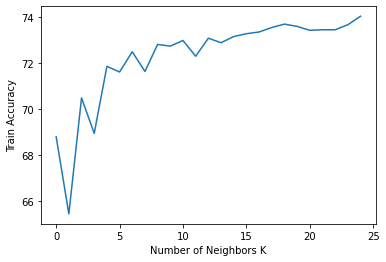

In [0]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train.values.ravel())
knnpred = knn.predict(X_test)
scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1 , scoring = 'accuracy')
knncv = round(scores.mean(),4)

# knnacc = round(accuracy_score(y_test, knnpred),2)*100
# print('Accuracy:\n',knnacc,'%\n')
knnacc = round(accuracy_score(y_test,knnpred),4)
print('Accuracy:\n',knnacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7351
Cross Validation Accuracy:
0.7368 (+/-0.0349)


In [0]:
# knnfc = round(f1_score(y_test,knnpred,pos_label=1),2)*100
knnfc = round(f1_score(y_test,knnpred,pos_label=1),4)
print(confusion_matrix(y_test, knnpred))
print('\n')
print(classification_report(y_test, knnpred, digits=4))

[[302 276]
 [181 966]]


              precision    recall  f1-score   support

           0     0.6253    0.5225    0.5693       578
           1     0.7778    0.8422    0.8087      1147

    accuracy                         0.7351      1725
   macro avg     0.7015    0.6823    0.6890      1725
weighted avg     0.7267    0.7351    0.7285      1725



Gradient Boosting

In [0]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

# learning_rate=[0.15,0.1,0.05,0.01,0.005,0.001] 
# n_estimators=[100,250,500,750,1000,1250,1500,1750]

# param_grid = dict(learning_rate=learning_rate,
#                   n_estimators=n_estimators)

# grid = GridSearchCV(estimator=GradientBoostingClassifier(),
#                     param_grid=param_grid,
#                     scoring='accuracy',
#                     verbose=1,
#                     n_jobs=-1)

# grid_result = grid.fit(X_train, y_train.values.ravel())

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier() # original
# gb = GradientBoostingClassifier(learning_rate= 0.005, n_estimators= 1250)
gb.fit(X_train, y_train.values.ravel())
gbpred = gb.predict(X_test)
scores = cross_val_score(gb, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
gbcv = round(scores.mean(),4)

# gbacc = round(accuracy_score(y_test, gbpred),2)*100
# print('Accuracy:\n',gbacc,'%\n')
gbacc = round(accuracy_score(y_test, gbpred),4)
print('Accuracy:\n',gbacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7577
Cross Validation Accuracy:
0.7554 (+/-0.0455)


In [0]:
# gbfc = round(f1_score(y_test,gbpred,pos_label=1),2)*100
gbfc = round(f1_score(y_test,gbpred,pos_label=1),4)
print(confusion_matrix(y_test, gbpred))
print('\n')
print(classification_report(y_test, gbpred, digits=4))

[[ 299  279]
 [ 139 1008]]


              precision    recall  f1-score   support

           0     0.6826    0.5173    0.5886       578
           1     0.7832    0.8788    0.8283      1147

    accuracy                         0.7577      1725
   macro avg     0.7329    0.6981    0.7084      1725
weighted avg     0.7495    0.7577    0.7480      1725



Logistic Regression

In [0]:
import eli5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
X_train_copy =pd.DataFrame(X_train.copy())
X_train_copy.columns = feature_names
X_train_copy

,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,-0.434033,-0.338607,0.584761,0.695064,0.910889,0.321323,0.231177,0.435933,0.360953,0.008272,-0.066999,0.090835,0.011928,-0.195144,-0.259682,0.247130,0.276754,0.306656,0.325132,-0.085640,-0.643991,-1.030760,-1.201585,-1.205888,-1.235947,-1.156803,-0.603704,-0.038152,-0.024613,-0.289016,-0.153630,-0.620755,0.831470,0.443079,0.671938
1,-0.691659,-0.928671,-0.751677,-1.011853,-0.776920,-0.703342,-0.759515,-1.444872,-1.313886,-1.644562,-1.405131,-1.280180,-1.189120,-1.276777,-1.184451,1.842148,2.192713,2.582219,2.930514,-1.154675,-0.500526,-0.744990,-0.698232,-0.796952,-0.731675,-0.722251,1.009326,-0.956502,-0.810734,0.136828,-1.302754,-1.192075,-0.941259,-1.209788,-1.109247
2,-0.090532,0.335753,0.481958,0.393843,0.712323,0.186811,0.499246,0.473917,0.360953,-0.036399,-0.156208,0.374542,0.257520,0.419525,0.334040,0.024703,0.054448,0.092164,0.133356,0.187558,-0.643991,2.437728,1.924890,1.764440,2.094977,2.109641,-0.009228,1.061673,0.898489,1.498866,1.064628,1.666078,0.681873,0.520316,0.645539
3,-0.863410,-1.265850,-0.546071,-0.409412,-0.776920,-0.444361,-0.662389,-0.753283,-0.805027,-1.390280,-1.239833,-0.990359,-0.984792,-1.107088,-1.072327,2.837222,3.116498,3.380431,3.527938,-0.793930,0.934124,-0.446591,-0.273206,-0.202561,-0.332878,-0.316243,1.105548,-1.074360,-0.868976,-0.308968,-0.960819,-0.581517,-1.378343,-1.024420,-1.256574
4,-0.777535,-1.012966,-0.032057,-0.509818,-0.280506,-0.620261,-0.606541,-0.665625,-0.729640,-0.572454,-0.629938,-0.779521,-0.815693,-0.757501,-0.786286,0.971003,1.062890,1.148477,1.189537,-0.768634,-1.146118,1.111214,1.116566,1.130015,1.171020,1.098785,0.976340,0.786100,0.886990,1.016189,0.724562,0.858900,-0.957793,-0.893976,-0.938427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,-0.262282,0.082868,-0.443268,-0.309005,-0.479071,0.174943,-0.103910,0.105242,-0.015561,0.397174,0.305350,0.132698,0.023804,0.324325,0.231323,0.157994,0.021219,-0.161230,-0.387149,-0.085640,-0.357061,1.249253,1.331546,1.507684,1.198982,1.403402,0.235448,-1.317543,-1.373622,-1.015432,-1.414863,-0.967500,-0.213743,0.149579,-0.025761
4072,-0.176407,0.167163,0.173549,-0.208598,-0.081940,-0.649788,-0.662389,-0.318204,-0.440658,-0.193293,-0.317360,-0.269341,-0.395257,-0.271858,-0.402175,0.036272,0.014349,-0.015122,-0.053632,-0.389193,0.431996,0.974092,1.006326,1.063953,1.064987,0.971690,-0.132000,0.291660,0.319036,1.421423,0.754458,1.209174,-0.149043,0.410468,0.123989
4073,0.939973,0.757227,0.893170,0.393843,0.613040,0.321323,0.273062,0.553052,0.391481,0.559216,0.369654,0.644358,0.470692,0.691985,0.494086,-1.086341,-0.969017,-0.779482,-0.489463,0.255858,-1.217851,0.102291,0.306831,0.446145,0.296696,0.256621,-0.994496,0.005744,0.003069,0.201827,0.149066,-0.022684,1.064497,0.820436,0.997531
4074,-1.893915,-1.940209,-0.443268,-0.710632,-0.578354,-0.922913,-1.109171,-1.716142,-1.463693,-1.644562,-1.405131,-1.888503,-1.573256,-1.903875,-1.581947,2.535501,2.309827,1.928464,1.333496,-1.451629,-1.289583,1.910566,1.674370,1.514044,1.695102,1.703927,0.675446,0.929292,0.469614,-0.717074,0.149066,0.020847,-1.019797,-1.024420,-1.037425


In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# penalty = ['l1', 'l2']
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# # class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
# solver = ['liblinear', 'saga'] 


# param_grid = dict(penalty=penalty,
#                   C=C,
#                   # class_weight=class_weight,
#                   solver=solver)

# grid = GridSearchCV(estimator=LogisticRegression(),
#                     param_grid=param_grid,
#                     scoring='accuracy',
#                     verbose=1,
#                     n_jobs=-1)

# grid_result = grid.fit(X_train, y_train.values.ravel())

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [0]:
# logreg = grid_result.best_estimator_
# logreg

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # original

logreg.fit(X_train_copy,y_train.values.ravel())

from IPython.display import display
display(eli5.show_weights(logreg,feature_names = list(X_train_copy.columns),feature_filter=lambda x: x != '<BIAS>'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Weight?,Feature
+1.075,Braycurtis Distance
+0.813,Normalized Longest Common Subsequence
+0.784,Fuzz Ratio
+0.751,Dependency Overlap F-measure
+0.724,Wu and Palmer's Measure
+0.690,Common Unigram Ratio
+0.495,Jaccard Similarity with Trigram
+0.454,Jaccard Similarity with 2-skip-2-gram
+0.349,City Block Distance
+0.340,Common Bigram Ratio


In [0]:
logpred = logreg.predict(X_test)
scores = cross_val_score(logreg, X_train_copy, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
logcv = round(scores.mean(),4)

# logacc = round(accuracy_score(y_test, logpred),2)*100
# print('Accuracy:\n',logacc,'%\n')
logacc = round(accuracy_score(y_test, logpred),4)
print('Accuracy:\n',logacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy:
 0.7687
Cross Validation Accuracy:
0.7613 (+/-0.0269)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
# logfc = round(f1_score(y_test,logpred,pos_label=1),2)*100
logfc = round(f1_score(y_test,logpred,pos_label=1),4)
print(confusion_matrix(y_test, logpred))
print('\n')
print(classification_report(y_test, logpred,digits=4))

[[ 324  254]
 [ 145 1002]]


              precision    recall  f1-score   support

           0     0.6908    0.5606    0.6189       578
           1     0.7978    0.8736    0.8340      1147

    accuracy                         0.7687      1725
   macro avg     0.7443    0.7171    0.7264      1725
weighted avg     0.7619    0.7687    0.7619      1725



Support Vector Machine

In [0]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# GridSearchCV for SVM is very computationally expensive

# C = [0.1,1, 10, 100]
# gamma = ['scale','auto']
# kernel = ['rbf', 'poly', 'sigmoid','linear']

# param_grid = dict(C=C,
#                   gamma=gamma,
#                   kernel=kernel
#                   )

# grid = GridSearchCV(estimator=SVC(),
#                     param_grid=param_grid,
#                     scoring='accuracy',
#                     verbose=1,
#                     n_jobs=-1)

# grid_result = grid.fit(X_train, y_train.values.ravel())

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)


# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# param_grid = {'C': [1], # 0.1, 1, 10, 100
#               'gamma': [1], # 1, 0.1, 0.01, 0.001
#               'kernel': ['poly','rbf','linear']} # 'rbf', 'poly'
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=20,n_jobs=-1, scoring='accuracy',cv=2)
# grid = GridSearchCV(SVC(),param_grid,verbose=2, scoring='accuracy',cv=2,n_jobs=-1)
# grid.fit(X_train,y_train.values.ravel())

# grid.best_params_
# grid.best_estimator_

In [0]:
from sklearn.svm import SVC
# svm = SVC(kernel = 'rbf',C=1,gamma='scale') # default hyperparameters
# svm = SVC(kernel = 'linear',C=1,probability=True)
svm = SVC(probability=True)
svm.fit(X_train, y_train.values.ravel())
svmpred = svm.predict(X_test)
scores = cross_val_score(svm, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
svmcv = round(scores.mean(),4)

# svmacc = round(accuracy_score(y_test, svmpred),2)*100
# print('Accuracy:\n',svmacc,'%\n')
svmacc = round(accuracy_score(y_test, svmpred),4)
print('Accuracy:\n',svmacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7646
Cross Validation Accuracy:
0.7564 (+/-0.0333)


In [0]:
# svmfc = round(f1_score(y_test,svmpred,pos_label=1),2)*100
svmfc = round(f1_score(y_test,svmpred,pos_label=1),4)
print(confusion_matrix(y_test, svmpred))
print('\n')
print(classification_report(y_test, svmpred,digits=4))

[[ 306  272]
 [ 134 1013]]


              precision    recall  f1-score   support

           0     0.6955    0.5294    0.6012       578
           1     0.7883    0.8832    0.8331      1147

    accuracy                         0.7646      1725
   macro avg     0.7419    0.7063    0.7171      1725
weighted avg     0.7572    0.7646    0.7554      1725



Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() #criterion = entropy,gini
rfc.fit(X_train, y_train.values.ravel())
rfcpred = rfc.predict(X_test)
scores = cross_val_score(rfc, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
rfcv = round(scores.mean(),4)

rfacc = round(accuracy_score(y_test, rfcpred),4)
print('Accuracy:\n',rfacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7565
Cross Validation Accuracy:
0.7596 (+/-0.0353)


In [0]:
rffc = round(f1_score(y_test,rfcpred,pos_label=1),4)
print(confusion_matrix(y_test, rfcpred))
print('\n')
print(classification_report(y_test, rfcpred, digits=4))

[[ 302  276]
 [ 144 1003]]


              precision    recall  f1-score   support

           0     0.6771    0.5225    0.5898       578
           1     0.7842    0.8745    0.8269      1147

    accuracy                         0.7565      1725
   macro avg     0.7307    0.6985    0.7084      1725
weighted avg     0.7483    0.7565    0.7475      1725



LightGBM

In [0]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train.values.ravel())
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 1000
params['min_data'] = 20
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

#Prediction
y_pred=clf.predict(X_test)

#convert into binary values
for i in range(len(y_pred)):
    if y_pred[i]>=.65:
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [0]:
pd.Series(y_pred).value_counts()

1.0    1169
0.0     556
dtype: int64

In [0]:
scores = lgb.cv(params, d_train, nfold=10)
print(scores['binary_logloss-stdv'])

[0.0007210425118026508, 0.0007413191737030472, 0.0007205738628518574, 0.000722634495598605, 0.0007147508349514033, 0.0007308108130139071, 0.0007506869467269597, 0.000767245981002257, 0.0007763585611972893, 0.0007988297539801962, 0.0007792345556632171, 0.0008145197829129676, 0.0008505134748849906, 0.0008725477605812228, 0.0009155300129271443, 0.00095842392106384, 0.0010014402753799716, 0.0010447020274508849, 0.0010653393834395009, 0.0010807564225335622, 0.001117994601354869, 0.0011372866931784198, 0.0011562075607383527, 0.0012039743557468623, 0.0011809723624026263, 0.0012009099283837078, 0.0012591591524906275, 0.001299401840408197, 0.0013273647581610792, 0.0013563485402062643, 0.0014076019785737096, 0.0014373636148546536, 0.0014450235272374444, 0.0014689678374287566, 0.0014878614047496407, 0.0015589944352876004, 0.0016138769965682242, 0.0016314220016558666, 0.001630919410818252, 0.0016766454591497246, 0.0017037587892475444, 0.0017146809223535253, 0.0017404703679185845, 0.001781889246809

In [0]:
scores = lgb.cv(params, d_train, nfold=10)
# lgbcv=round(np.array(scores['binary_logloss-mean']).mean(),2)*100
lgbcv=round(np.array(scores['binary_logloss-mean']).mean(),4)

lgbacc = round(accuracy_score(y_test, y_pred),4)
print('Accuracy:\n',lgbacc)
 
#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (np.array(scores['binary_logloss-mean']).mean(), np.array(scores['binary_logloss-stdv']).mean()*2))

Accuracy:
 0.76
Cross Validation Accuracy:
0.5995 (+/-0.0040)


In [0]:
lgbfc = round(f1_score(y_test,y_pred,pos_label=1),4)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred,digits=4))

[[360 218]
 [196 951]]


              precision    recall  f1-score   support

           0     0.6475    0.6228    0.6349       578
           1     0.8135    0.8291    0.8212      1147

    accuracy                         0.7600      1725
   macro avg     0.7305    0.7260    0.7281      1725
weighted avg     0.7579    0.7600    0.7588      1725



XGBoost

In [0]:
import xgboost

xgb = xgboost.XGBClassifier()
# xgb = xgboost.XGBClassifier(booster='gbtree',
#                             learning_rate=0.1,
#                             max_depth=3,
#                             min_child_weight=3,
#                             gamma=0.0,
#                             subsample=0.6,
#                             colsample_bytree=1,
#                             n_estimators=70,
#                             )
xgb.fit(X_train, y_train.values.ravel())

# scores = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=-1, scoring = 'accuracy')
# xgbcv = round(scores.mean(),2)*100

# #For more reliable accuracy
# print("Cross Validation Accuracy:\n%0.4f (+/-%0.2f)" % (scores.mean(), scores.std()*2))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[0.04594679 0.02539593 0.01493258 0.01706627 0.20558527 0.05057758
 0.06265049 0.01377626 0.01332179 0.02624454 0.04530023 0.02082877
 0.02860526 0.02062013 0.01213377 0.01681942 0.01739134 0.01706415
 0.01517052 0.0361857  0.03031456 0.01362155 0.02787243 0.0133682
 0.0467301  0.02931651 0.02098846 0.01261359 0.01368434 0.01316894
 0.01288223 0.01352606 0.01425867 0.01223678 0.01980087]




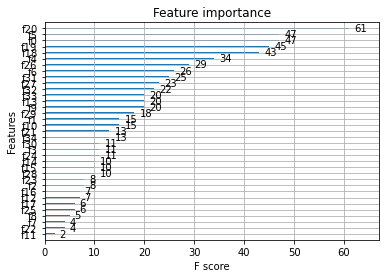

In [0]:
from xgboost import plot_importance

# feature importance
print(xgb.feature_importances_)
print('\n')

plot_importance(xgb)

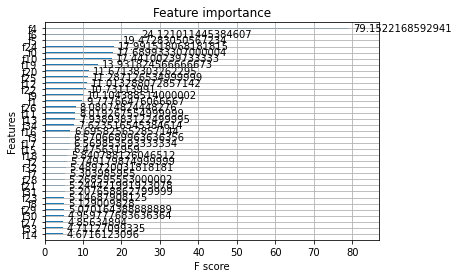

In [0]:
plot_importance(xgb,importance_type='gain')

In [0]:
# feature_importance = xgb.get_booster().get_score(importance_type= 'gain')
# print(sorted(feature_importance.items(), key = 
#              lambda kv:(kv[1], kv[0]),reverse=True))
# a = list(sorted(feature_importance.items(), key = 
#              lambda kv:(kv[1], kv[0]),reverse=False))
# lists = tuple(a) # a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples
# print(a)
# print(lists)
# x, y = zip(*lists)
# x = list(x)
# print(x)
# print(y)

In [0]:
# Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
f = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

feature_importance = xgb.get_booster().get_score(importance_type= 'gain')
print(sorted(feature_importance.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True))

a = list(sorted(feature_importance.items(), key = 
             lambda kv:(kv[1], kv[0])))

lists = tuple(a) # a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print(a)
print(lists)
x, y = zip(*lists)
x = list(x)
print(x)
print(feature_names)
r = []
for i in range(len(x)):
   r.append(feature_names[int(x[i][1:])])

# # print(y)
# # print(x)
# # print(feature_names[int(x[0][1])])
# # x[0] = feature_names[int(x[0][1])]
# # x[1] = feature_names[int(x[1][1])]
# # print(x[0])
# # print(x[1])
# print(r)

[('f4', 79.1522168592941), ('f6', 24.121011445384607), ('f5', 19.47283050567234), ('f24', 17.991518068181815), ('f0', 17.689933307000004), ('f10', 17.44100239733333), ('f19', 13.931824566666673), ('f20', 11.67138303262295), ('f25', 11.287126534999999), ('f12', 11.013288072857142), ('f22', 10.73113991), ('f9', 10.104388514000002), ('f1', 9.77766476066667), ('f26', 8.08074824448276), ('f11', 8.019267554999999), ('f13', 7.9389383122499995), ('f34', 7.623516545384614), ('f16', 6.695825652857144), ('f3', 6.5706689963636356), ('f17', 6.569853593333334), ('f15', 6.475631959), ('f18', 5.840788126046512), ('f2', 5.749179874999999), ('f32', 5.489720031818181), ('f7', 5.303985955), ('f28', 5.268595553000002), ('f21', 5.244421991923078), ('f31', 5.207658862799999), ('f23', 5.14687908125), ('f8', 5.129009828), ('f29', 5.070164388888889), ('f30', 4.959777683636364), ('f27', 4.85634894), ('f33', 4.71127099335), ('f14', 4.6716123096)]
[('f14', 4.6716123096), ('f33', 4.71127099335), ('f27', 4.85634894)

In [0]:
df_demo = pd.DataFrame({'Original x': [i for i in x],
                       'Modified x': [i for i in r],
                        'Feature Importance Values': [i for i in y]})
df_demo

,Original x,Modified x,Feature Importance Values
0,f14,Jaccard Similarity with 2-skip-2-gram,4.671612
1,f33,Dependency Overlap Recall,4.711271
2,f27,Wu and Palmer's Measure,4.856349
3,f30,Jiang and Conrath's Measure,4.959778
4,f29,Leakcock and Chodorow's Measure,5.070164
5,f8,Jaccard Similarity with Bigram,5.129010
6,f23,Canberra Distance,5.146879
7,f31,Lin's Measure,5.207659
8,f21,Cosine Distance,5.244422
9,f28,Shortest Path based Measure,5.268596


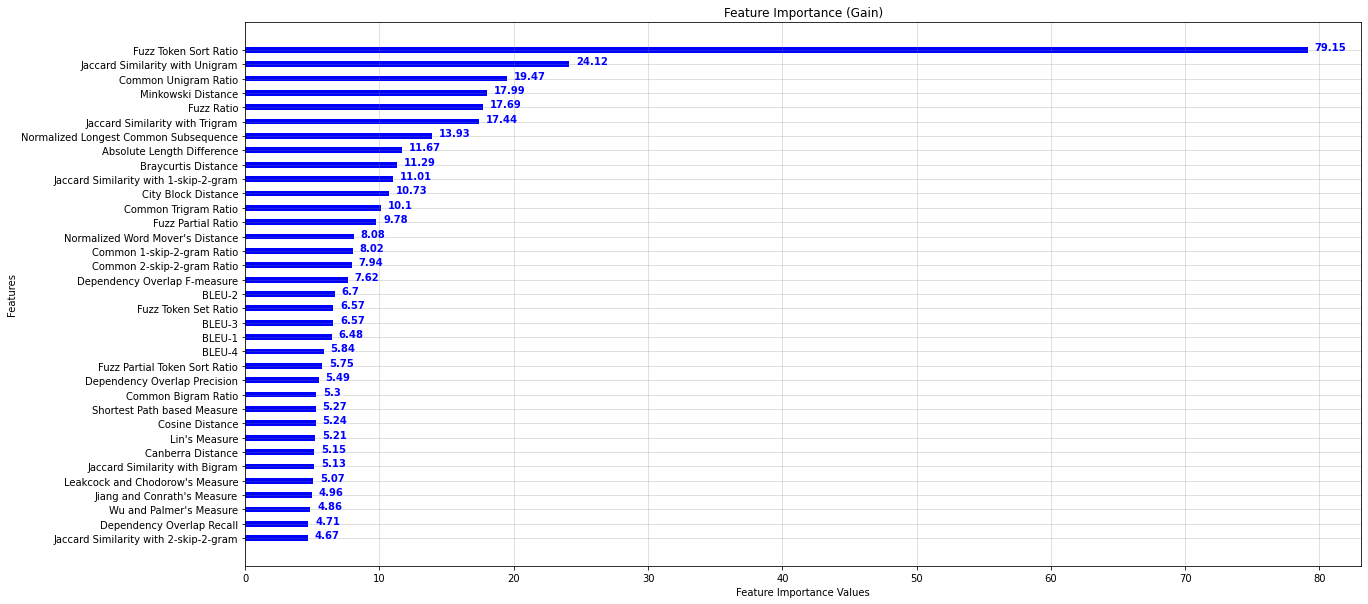

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# lists = tuple(a) # a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
# plt.barh(x,y,align='center',color='b')
plt.barh(r,y,align='center',color='b',height=0.4)
# plt.barh(x,y,align='center',color='b',height=0.4)


for i,v in enumerate(y):
  # plt.text(x=v+1, y=i+.25,s=str(round(v,2)), color='blue', fontweight='bold')
  plt.text(x=v+0.5, y=i,s=str(round(v,2)), color='blue', fontweight='bold')


plt.grid(color='grey',alpha=0.3)

plt.title("Feature Importance (Gain)")
plt.xlabel('Feature Importance Values')
# plt.yticks(feature_names)
plt.ylabel('Features')
plt.show() 

In [0]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.434033,-0.338607,0.584761,0.695064,0.910889,0.321323,0.231177,0.435933,0.360953,0.008272,-0.066999,0.090835,0.011928,-0.195144,-0.259682,0.247130,0.276754,0.306656,0.325132,-0.085640,-0.643991,-1.030760,-1.201585,-1.205888,-1.235947,-1.156803,-0.603704,-0.038152,-0.024613,-0.289016,-0.153630,-0.620755,0.831470,0.443079,0.671938
1,-0.691659,-0.928671,-0.751677,-1.011853,-0.776920,-0.703342,-0.759515,-1.444872,-1.313886,-1.644562,-1.405131,-1.280180,-1.189120,-1.276777,-1.184451,1.842148,2.192713,2.582219,2.930514,-1.154675,-0.500526,-0.744990,-0.698232,-0.796952,-0.731675,-0.722251,1.009326,-0.956502,-0.810734,0.136828,-1.302754,-1.192075,-0.941259,-1.209788,-1.109247
2,-0.090532,0.335753,0.481958,0.393843,0.712323,0.186811,0.499246,0.473917,0.360953,-0.036399,-0.156208,0.374542,0.257520,0.419525,0.334040,0.024703,0.054448,0.092164,0.133356,0.187558,-0.643991,2.437728,1.924890,1.764440,2.094977,2.109641,-0.009228,1.061673,0.898489,1.498866,1.064628,1.666078,0.681873,0.520316,0.645539
3,-0.863410,-1.265850,-0.546071,-0.409412,-0.776920,-0.444361,-0.662389,-0.753283,-0.805027,-1.390280,-1.239833,-0.990359,-0.984792,-1.107088,-1.072327,2.837222,3.116498,3.380431,3.527938,-0.793930,0.934124,-0.446591,-0.273206,-0.202561,-0.332878,-0.316243,1.105548,-1.074360,-0.868976,-0.308968,-0.960819,-0.581517,-1.378343,-1.024420,-1.256574
4,-0.777535,-1.012966,-0.032057,-0.509818,-0.280506,-0.620261,-0.606541,-0.665625,-0.729640,-0.572454,-0.629938,-0.779521,-0.815693,-0.757501,-0.786286,0.971003,1.062890,1.148477,1.189537,-0.768634,-1.146118,1.111214,1.116566,1.130015,1.171020,1.098785,0.976340,0.786100,0.886990,1.016189,0.724562,0.858900,-0.957793,-0.893976,-0.938427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,-0.262282,0.082868,-0.443268,-0.309005,-0.479071,0.174943,-0.103910,0.105242,-0.015561,0.397174,0.305350,0.132698,0.023804,0.324325,0.231323,0.157994,0.021219,-0.161230,-0.387149,-0.085640,-0.357061,1.249253,1.331546,1.507684,1.198982,1.403402,0.235448,-1.317543,-1.373622,-1.015432,-1.414863,-0.967500,-0.213743,0.149579,-0.025761
4072,-0.176407,0.167163,0.173549,-0.208598,-0.081940,-0.649788,-0.662389,-0.318204,-0.440658,-0.193293,-0.317360,-0.269341,-0.395257,-0.271858,-0.402175,0.036272,0.014349,-0.015122,-0.053632,-0.389193,0.431996,0.974092,1.006326,1.063953,1.064987,0.971690,-0.132000,0.291660,0.319036,1.421423,0.754458,1.209174,-0.149043,0.410468,0.123989
4073,0.939973,0.757227,0.893170,0.393843,0.613040,0.321323,0.273062,0.553052,0.391481,0.559216,0.369654,0.644358,0.470692,0.691985,0.494086,-1.086341,-0.969017,-0.779482,-0.489463,0.255858,-1.217851,0.102291,0.306831,0.446145,0.296696,0.256621,-0.994496,0.005744,0.003069,0.201827,0.149066,-0.022684,1.064497,0.820436,0.997531
4074,-1.893915,-1.940209,-0.443268,-0.710632,-0.578354,-0.922913,-1.109171,-1.716142,-1.463693,-1.644562,-1.405131,-1.888503,-1.573256,-1.903875,-1.581947,2.535501,2.309827,1.928464,1.333496,-1.451629,-1.289583,1.910566,1.674370,1.514044,1.695102,1.703927,0.675446,0.929292,0.469614,-0.717074,0.149066,0.020847,-1.019797,-1.024420,-1.037425


In [0]:
feature_names

['Fuzz Ratio',
 'Fuzz Partial Ratio',
 'Fuzz Partial Token Sort Ratio',
 'Fuzz Token Set Ratio',
 'Fuzz Token Sort Ratio',
 'Common Unigram Ratio',
 'Jaccard Similarity with Unigram',
 'Common Bigram Ratio',
 'Jaccard Similarity with Bigram',
 'Common Trigram Ratio',
 'Jaccard Similarity with Trigram',
 'Common 1-skip-2-gram Ratio',
 'Jaccard Similarity with 1-skip-2-gram',
 'Common 2-skip-2-gram Ratio',
 'Jaccard Similarity with 2-skip-2-gram',
 'BLEU-1',
 'BLEU-2',
 'BLEU-3',
 'BLEU-4',
 'Normalized Longest Common Subsequence',
 'Absolute Length Difference',
 'Cosine Distance',
 'City Block Distance',
 'Canberra Distance',
 'Minkowski Distance',
 'Braycurtis Distance',
 "Normalized Word Mover's Distance",
 "Wu and Palmer's Measure",
 'Shortest Path based Measure',
 "Leakcock and Chodorow's Measure",
 "Jiang and Conrath's Measure",
 "Lin's Measure",
 'Dependency Overlap Precision',
 'Dependency Overlap Recall',
 'Dependency Overlap F-measure']

In [0]:
X_train_copy = pd.DataFrame(X_train.copy())
X_train_copy.columns = feature_names
X_train_copy

,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Partial Token Sort Ratio,Fuzz Token Set Ratio,Fuzz Token Sort Ratio,Common Unigram Ratio,Jaccard Similarity with Unigram,Common Bigram Ratio,Jaccard Similarity with Bigram,Common Trigram Ratio,Jaccard Similarity with Trigram,Common 1-skip-2-gram Ratio,Jaccard Similarity with 1-skip-2-gram,Common 2-skip-2-gram Ratio,Jaccard Similarity with 2-skip-2-gram,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Normalized Longest Common Subsequence,Absolute Length Difference,Cosine Distance,City Block Distance,Canberra Distance,Minkowski Distance,Braycurtis Distance,Normalized Word Mover's Distance,Wu and Palmer's Measure,Shortest Path based Measure,Leakcock and Chodorow's Measure,Jiang and Conrath's Measure,Lin's Measure,Dependency Overlap Precision,Dependency Overlap Recall,Dependency Overlap F-measure
0,-0.434033,-0.338607,0.584761,0.695064,0.910889,0.321323,0.231177,0.435933,0.360953,0.008272,-0.066999,0.090835,0.011928,-0.195144,-0.259682,0.247130,0.276754,0.306656,0.325132,-0.085640,-0.643991,-1.030760,-1.201585,-1.205888,-1.235947,-1.156803,-0.603704,-0.038152,-0.024613,-0.289016,-0.153630,-0.620755,0.831470,0.443079,0.671938
1,-0.691659,-0.928671,-0.751677,-1.011853,-0.776920,-0.703342,-0.759515,-1.444872,-1.313886,-1.644562,-1.405131,-1.280180,-1.189120,-1.276777,-1.184451,1.842148,2.192713,2.582219,2.930514,-1.154675,-0.500526,-0.744990,-0.698232,-0.796952,-0.731675,-0.722251,1.009326,-0.956502,-0.810734,0.136828,-1.302754,-1.192075,-0.941259,-1.209788,-1.109247
2,-0.090532,0.335753,0.481958,0.393843,0.712323,0.186811,0.499246,0.473917,0.360953,-0.036399,-0.156208,0.374542,0.257520,0.419525,0.334040,0.024703,0.054448,0.092164,0.133356,0.187558,-0.643991,2.437728,1.924890,1.764440,2.094977,2.109641,-0.009228,1.061673,0.898489,1.498866,1.064628,1.666078,0.681873,0.520316,0.645539
3,-0.863410,-1.265850,-0.546071,-0.409412,-0.776920,-0.444361,-0.662389,-0.753283,-0.805027,-1.390280,-1.239833,-0.990359,-0.984792,-1.107088,-1.072327,2.837222,3.116498,3.380431,3.527938,-0.793930,0.934124,-0.446591,-0.273206,-0.202561,-0.332878,-0.316243,1.105548,-1.074360,-0.868976,-0.308968,-0.960819,-0.581517,-1.378343,-1.024420,-1.256574
4,-0.777535,-1.012966,-0.032057,-0.509818,-0.280506,-0.620261,-0.606541,-0.665625,-0.729640,-0.572454,-0.629938,-0.779521,-0.815693,-0.757501,-0.786286,0.971003,1.062890,1.148477,1.189537,-0.768634,-1.146118,1.111214,1.116566,1.130015,1.171020,1.098785,0.976340,0.786100,0.886990,1.016189,0.724562,0.858900,-0.957793,-0.893976,-0.938427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,-0.262282,0.082868,-0.443268,-0.309005,-0.479071,0.174943,-0.103910,0.105242,-0.015561,0.397174,0.305350,0.132698,0.023804,0.324325,0.231323,0.157994,0.021219,-0.161230,-0.387149,-0.085640,-0.357061,1.249253,1.331546,1.507684,1.198982,1.403402,0.235448,-1.317543,-1.373622,-1.015432,-1.414863,-0.967500,-0.213743,0.149579,-0.025761
4072,-0.176407,0.167163,0.173549,-0.208598,-0.081940,-0.649788,-0.662389,-0.318204,-0.440658,-0.193293,-0.317360,-0.269341,-0.395257,-0.271858,-0.402175,0.036272,0.014349,-0.015122,-0.053632,-0.389193,0.431996,0.974092,1.006326,1.063953,1.064987,0.971690,-0.132000,0.291660,0.319036,1.421423,0.754458,1.209174,-0.149043,0.410468,0.123989
4073,0.939973,0.757227,0.893170,0.393843,0.613040,0.321323,0.273062,0.553052,0.391481,0.559216,0.369654,0.644358,0.470692,0.691985,0.494086,-1.086341,-0.969017,-0.779482,-0.489463,0.255858,-1.217851,0.102291,0.306831,0.446145,0.296696,0.256621,-0.994496,0.005744,0.003069,0.201827,0.149066,-0.022684,1.064497,0.820436,0.997531
4074,-1.893915,-1.940209,-0.443268,-0.710632,-0.578354,-0.922913,-1.109171,-1.716142,-1.463693,-1.644562,-1.405131,-1.888503,-1.573256,-1.903875,-1.581947,2.535501,2.309827,1.928464,1.333496,-1.451629,-1.289583,1.910566,1.674370,1.514044,1.695102,1.703927,0.675446,0.929292,0.469614,-0.717074,0.149066,0.020847,-1.019797,-1.024420,-1.037425


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


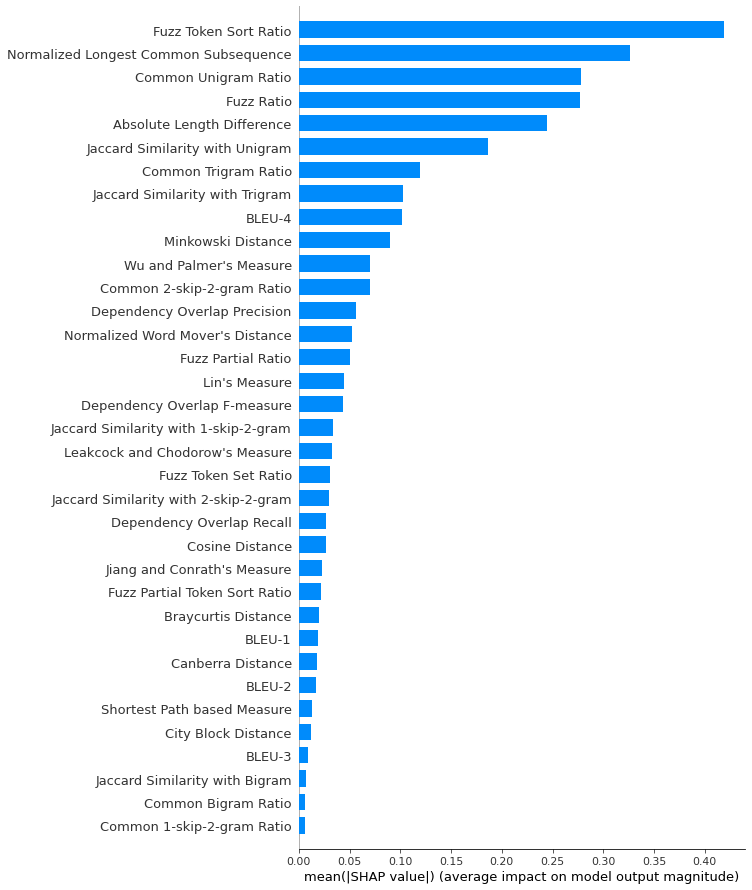

In [0]:
# SHAP
import shap

shap.initjs()

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train_copy)
shap.summary_plot(shap_values, X_train_copy, plot_type="bar",max_display=39)

In [0]:
from numpy import sort
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
thresholds

array([0.01213377, 0.01223678, 0.01261359, 0.01288223, 0.01316894,
       0.01332179, 0.0133682 , 0.01352606, 0.01362155, 0.01368434,
       0.01377626, 0.01425867, 0.01493258, 0.01517052, 0.01681942,
       0.01706415, 0.01706627, 0.01739134, 0.01980087, 0.02062013,
       0.02082877, 0.02098846, 0.02539593, 0.02624454, 0.02787243,
       0.02860526, 0.02931651, 0.03031456, 0.0361857 , 0.04530023,
       0.04594679, 0.0467301 , 0.05057758, 0.06265049, 0.20558527],
      dtype=float32)

In [0]:
from sklearn.feature_selection import SelectFromModel

for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = xgboost.XGBClassifier()
	selection_model.fit(select_X_train, y_train.values.ravel())
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	# y_pred = [int(value) for value in y_pred]
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.012, n=35, Accuracy: 75.94%
Thresh=0.012, n=34, Accuracy: 76.00%
Thresh=0.013, n=33, Accuracy: 76.00%
Thresh=0.013, n=32, Accuracy: 75.77%
Thresh=0.013, n=31, Accuracy: 75.54%
Thresh=0.013, n=30, Accuracy: 76.17%
Thresh=0.013, n=29, Accuracy: 75.94%
Thresh=0.014, n=28, Accuracy: 76.12%
Thresh=0.014, n=27, Accuracy: 76.12%
Thresh=0.014, n=26, Accuracy: 75.83%
Thresh=0.014, n=25, Accuracy: 76.12%
Thresh=0.014, n=24, Accuracy: 75.71%
Thresh=0.015, n=23, Accuracy: 75.71%
Thresh=0.015, n=22, Accuracy: 75.83%
Thresh=0.017, n=21, Accuracy: 75.88%
Thresh=0.017, n=20, Accuracy: 76.35%
Thresh=0.017, n=19, Accuracy: 75.77%
Thresh=0.017, n=18, Accuracy: 75.48%
Thresh=0.020, n=17, Accuracy: 75.59%
Thresh=0.021, n=16, Accuracy: 75.94%
Thresh=0.021, n=15, Accuracy: 76.35%
Thresh=0.021, n=14, Accuracy: 76.23%
Thresh=0.025, n=13, Accuracy: 76.29%
Thresh=0.026, n=12, Accuracy: 76.23%
Thresh=0.028, n=11, Accuracy: 76.12%
Thresh=0.029, n=10, Accuracy: 76.46%
Thresh=0.029, n=9, Accuracy: 75.59%
Th

In [0]:
y_pred = xgb.predict(X_test)
scores = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')
xgbcv = round(scores.mean(),4)

# xgbacc = round(accuracy_score(y_test, y_pred),2)*100
# print('Accuracy:\n',round(accuracy_score(y_test, y_pred),2)*100,'%\n')
xgbacc = round(accuracy_score(y_test, y_pred),4)
print('Accuracy:\n',round(accuracy_score(y_test, y_pred),4))

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

Accuracy:
 0.7594
Cross Validation Accuracy:
0.7522 (+/-0.0426)


In [0]:
# xgbfc = round(f1_score(y_test,y_pred,pos_label=1),2)*100
xgbfc = round(f1_score(y_test,y_pred,pos_label=1),4)
print(confusion_matrix(y_test, y_pred))  
print('Accuracy', accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred,digits=4))

[[ 304  274]
 [ 141 1006]]
Accuracy 0.7594202898550725


              precision    recall  f1-score   support

           0     0.6831    0.5260    0.5943       578
           1     0.7859    0.8771    0.8290      1147

    accuracy                         0.7594      1725
   macro avg     0.7345    0.7015    0.7117      1725
weighted avg     0.7515    0.7594    0.7504      1725



In [0]:
print('Performance of Classifiers on Training Data of Microsoft Research Paraphrase Corpus')
classifier_performance_train = pd.DataFrame({
                'Classifier': ['XGBoost', 'Gradient Boosting','AdaBoost', 'Support Vector Machine', 'K Nearest Neighbors', 
                               'Logistic Regression', 'Random Forest', 'LightGBM','Baseline'],
                'Cross Validation Accuracy':  [xgbcv, gbcv, adbcv, svmcv, knncv, logcv, rfcv, lgbcv, dcv]})

classifier_performance_train = classifier_performance_train.sort_values(by=['Cross Validation Accuracy'], ascending=False)
#classifier_performance = classifier_performance.style.set_properties(**{'text-align': 'center'})
#classifier_performance = classifier_performance.reset_index()

classifier_performance_train

Performance of Classifiers on Training Data of Microsoft Research Paraphrase Corpus


,Classifier,Cross Validation Accuracy
5,Logistic Regression,0.7613
6,Random Forest,0.7596
3,Support Vector Machine,0.7564
1,Gradient Boosting,0.7554
0,XGBoost,0.7522
4,K Nearest Neighbors,0.7368
2,AdaBoost,0.7360
8,Baseline,0.6754
7,LightGBM,0.5995


In [0]:
print('Performance of Classifiers on Test Data of Microsoft Research Paraphrase Corpus')
classifier_performance_test = pd.DataFrame({
                'Classifier': ['XGBoost', 'Gradient Boosting','AdaBoost', 'Support Vector Machine', 'K Nearest Neighbors', 
                               'Logistic Regression', 'Random Forest', 'LightGBM','Baseline'],
                'Accuracy':  [xgbacc, gbacc, adbacc, svmacc, knnacc, logacc, rfacc, lgbacc,dacc],
                'Per-Class F1 Score for Positive Class': [xgbfc, gbfc, adbfc, svmfc, knnfc, logfc, rffc, lgbfc, dfc]})

classifier_performance_test = classifier_performance_test.sort_values(by=['Accuracy','Per-Class F1 Score for Positive Class'], ascending=False)
#classifier_performance = classifier_performance.style.set_properties(**{'text-align': 'center'})
#classifier_performance = classifier_performance.reset_index()

classifier_performance_test

Performance of Classifiers on Test Data of Microsoft Research Paraphrase Corpus


,Classifier,Accuracy,Per-Class F1 Score for Positive Class
5,Logistic Regression,0.7687,0.8340
3,Support Vector Machine,0.7646,0.8331
7,LightGBM,0.7600,0.8212
0,XGBoost,0.7594,0.8290
1,Gradient Boosting,0.7577,0.8283
6,Random Forest,0.7565,0.8269
2,AdaBoost,0.7455,0.8199
4,K Nearest Neighbors,0.7351,0.8087
8,Baseline,0.6649,0.7987


Top 3 classifers taken for Voting Scheme

In [0]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of the top 3 classifiers
# estimators=[('svm', svm),('logreg',logreg),('xgb', xgb)]
estimators=[('logreg', logreg),('rfc',rfc),('svm', svm)]
# estimators = [('xgb',xgb),('gb',gb),('adb',adb)]

#create the voting classifier
# ensemble = VotingClassifier(estimators, voting='hard')
voting_classifier = VotingClassifier(estimators, voting='soft')

In [0]:
#fit ensemble model to training data
voting_classifier.fit(X_train, y_train.values.ravel())

# SHAP does not work for Voting Classifier
# explainer = shap.TreeExplainer(ensembleClassifier)
# shap_values = explainer.shap_values(X_train_copy)
# shap.summary_plot(shap_values, X_train_copy, plot_type="bar")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=No...
                                        

In [0]:
# eli5 does not work for voting classifier
# display(eli5.show_weights(ensembleClassifier,feature_names = list(X_train_copy.columns),feature_filter=lambda x: x != '<BIAS>'))

In [0]:
y_pred = voting_classifier.predict(X_test)
scores = cross_val_score(voting_classifier, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy')

# votingacc = round(accuracy_score(y_test, y_pred),2)*100
# print('Accuracy:\n',votingacc,'%\n')
votingacc = round(accuracy_score(y_test, y_pred),4)
print('Accuracy:\n',votingacc)

#For more reliable accuracy
print("Cross Validation Accuracy:\n%0.4f (+/-%0.4f)" % (scores.mean(), scores.std()*2))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy:
 0.771
Cross Validation Accuracy:
0.7655 (+/-0.0360)


In [0]:
print(confusion_matrix(y_test, y_pred))
print('\n')  
print(classification_report(y_test, y_pred,digits=4))

[[ 315  263]
 [ 132 1015]]


              precision    recall  f1-score   support

           0     0.7047    0.5450    0.6146       578
           1     0.7942    0.8849    0.8371      1147

    accuracy                         0.7710      1725
   macro avg     0.7495    0.7149    0.7259      1725
weighted avg     0.7642    0.7710    0.7626      1725



In [0]:
# To unmount Google Drive in Google Colab 
#drive.flush_and_unmount()